In [1]:
import h5py
import pandas as pd
import numpy as np


#from plotnine import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier
    
#import statsmodels.api as sm

#from scipy.stats import mode

import random
from IPython.display import Image
import pydot
from pydot import Dot
 
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

import tensorflow as tf
#import keras-gpu
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
#from keras.np_utils import probas_to_classes 
from keras.layers import Dense, Dropout, Input, Reshape
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D, merge, Concatenate, Conv2D, MaxPooling2D
from keras.layers.merge import concatenate, add
from keras.models import load_model
from keras.utils import plot_model
from keras.callbacks import TensorBoard
from keras import regularizers



#from hyperopt import Trials, STATUS_OK, tpe
#from hyperas import optim
#from hyperas.distributions import choice, uniform

import gc

import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

Using TensorFlow backend.


Ask tenserflow not to be too gready on GPU

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

K.set_session(sess)

keras.__version__

#with eeg only 5 filters, kernel size 100
#Test score:  1.3631985359422534
#Test accuracy:  0.6440793987471519

'2.2.0'

In [4]:
dataPath = "C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\raw\\"

trainOutput = pd.read_csv(dataPath + "challenge_fichier_de_sortie_dentrainement_classification_en_stade_de_sommeil_a_laide_de_signaux_mesures_par_le_bandeau_dreem.csv", sep=";")
Y = trainOutput["label"]

In [5]:
training = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\proba11test.xlsx')
test = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\proba11test.xlsx')  

In [6]:
X = training.iloc[:,:-1]
X_train = X.values
y = training.iloc[:,-1]
y_train = to_categorical(y.values, num_classes=5)
X_test = test.iloc[:,:-1].values
y_true = test.iloc[:,-1].values
y_test = to_categorical(y_true, num_classes=5)


In [7]:
print(y_test.shape)
print(X_test.shape)
print(y_true.shape)
print(X_train.shape)

(8756, 5)
(8756, 55)
(8756,)
(8756, 55)


In [48]:
%%time
model = Sequential()
model.add(Dense(55, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(32, input_dim=784))


#model.add(Dropout(0.5))
#model.add(Dense(55, activation='relu'))
model.add(Dense(5, activation='softmax'))

#optimizer = SGD(lr=0.0001)
#optimizer='rmsprop'
optimizer=Adam(0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=100, epochs=10000, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, batch_size=100)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])


#model.save('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\models\\' + str(modelfile)+ '.h5')




Train on 8756 samples, validate on 8756 samples
Epoch 1/10000
8756/8756 [==============================] - 1s 82us/step - loss: 1.6859 - acc: 0.2007 - val_loss: 1.5302 - val_acc: 0.4331
Epoch 2/10000
8756/8756 [==============================] - 0s 48us/step - loss: 1.3986 - acc: 0.5263 - val_loss: 1.2723 - val_acc: 0.5753
Epoch 3/10000
8756/8756 [==============================] - 0s 46us/step - loss: 1.1685 - acc: 0.6946 - val_loss: 1.0667 - val_acc: 0.7532
Epoch 4/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.9818 - acc: 0.7707 - val_loss: 0.9030 - val_acc: 0.7862
Epoch 5/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.8436 - acc: 0.7947 - val_loss: 0.7886 - val_acc: 0.7997
Epoch 6/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.7467 - acc: 0.8036 - val_loss: 0.7085 - val_acc: 0.8056
Epoch 7/10000
8756/8756 [==============================] - 0s 49us/step - loss: 0.6815 - acc: 0.8072 - val_loss: 0.6570 - va

8756/8756 [==============================] - 0s 48us/step - loss: 0.5132 - acc: 0.8210 - val_loss: 0.5126 - val_acc: 0.8212
Epoch 60/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.5128 - acc: 0.8216 - val_loss: 0.5122 - val_acc: 0.8216
Epoch 61/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.5122 - acc: 0.8215 - val_loss: 0.5116 - val_acc: 0.8221
Epoch 62/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.5118 - acc: 0.8220 - val_loss: 0.5111 - val_acc: 0.8216
Epoch 63/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.5113 - acc: 0.8213 - val_loss: 0.5106 - val_acc: 0.8212
Epoch 64/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.5108 - acc: 0.8218 - val_loss: 0.5102 - val_acc: 0.8212
Epoch 65/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.5102 - acc: 0.8217 - val_loss: 0.5097 - val_acc: 0.8215
Epoch 66/10000
8756/8756 [================

Epoch 118/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4909 - acc: 0.8265 - val_loss: 0.4904 - val_acc: 0.8271
Epoch 119/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.4908 - acc: 0.8263 - val_loss: 0.4901 - val_acc: 0.8269
Epoch 120/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.4903 - acc: 0.8274 - val_loss: 0.4898 - val_acc: 0.8270
Epoch 121/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.4901 - acc: 0.8267 - val_loss: 0.4895 - val_acc: 0.8267
Epoch 122/10000
8756/8756 [==============================] - 0s 50us/step - loss: 0.4898 - acc: 0.8270 - val_loss: 0.4892 - val_acc: 0.8271
Epoch 123/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4895 - acc: 0.8273 - val_loss: 0.4889 - val_acc: 0.8274
Epoch 124/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4891 - acc: 0.8275 - val_loss: 0.4886 - val_acc: 0.8272
Epoch 125/10000
8756

8756/8756 [==============================] - 0s 44us/step - loss: 0.4759 - acc: 0.8296 - val_loss: 0.4752 - val_acc: 0.8301
Epoch 177/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4755 - acc: 0.8301 - val_loss: 0.4750 - val_acc: 0.8298
Epoch 178/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4754 - acc: 0.8288 - val_loss: 0.4747 - val_acc: 0.8296
Epoch 179/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4750 - acc: 0.8294 - val_loss: 0.4745 - val_acc: 0.8299
Epoch 180/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4749 - acc: 0.8298 - val_loss: 0.4743 - val_acc: 0.8299
Epoch 181/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4746 - acc: 0.8297 - val_loss: 0.4740 - val_acc: 0.8298
Epoch 182/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4744 - acc: 0.8291 - val_loss: 0.4738 - val_acc: 0.8297
Epoch 183/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 43us/step - loss: 0.4633 - acc: 0.8322 - val_loss: 0.4627 - val_acc: 0.8323
Epoch 235/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4632 - acc: 0.8317 - val_loss: 0.4625 - val_acc: 0.8319
Epoch 236/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4629 - acc: 0.8322 - val_loss: 0.4623 - val_acc: 0.8321
Epoch 237/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4628 - acc: 0.8329 - val_loss: 0.4621 - val_acc: 0.8321
Epoch 238/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4625 - acc: 0.8320 - val_loss: 0.4620 - val_acc: 0.8313
Epoch 239/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4624 - acc: 0.8315 - val_loss: 0.4618 - val_acc: 0.8312
Epoch 240/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4621 - acc: 0.8319 - val_loss: 0.4615 - val_acc: 0.8315
Epoch 241/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 40us/step - loss: 0.4534 - acc: 0.8336 - val_loss: 0.4527 - val_acc: 0.8338
Epoch 293/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4533 - acc: 0.8333 - val_loss: 0.4526 - val_acc: 0.8334
Epoch 294/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4529 - acc: 0.8337 - val_loss: 0.4525 - val_acc: 0.8342
Epoch 295/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4531 - acc: 0.8336 - val_loss: 0.4523 - val_acc: 0.8337
Epoch 296/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4527 - acc: 0.8339 - val_loss: 0.4521 - val_acc: 0.8333
Epoch 297/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4527 - acc: 0.8331 - val_loss: 0.4520 - val_acc: 0.8337
Epoch 298/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4524 - acc: 0.8343 - val_loss: 0.4519 - val_acc: 0.8343
Epoch 299/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 40us/step - loss: 0.4453 - acc: 0.8349 - val_loss: 0.4446 - val_acc: 0.8358
Epoch 351/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4450 - acc: 0.8361 - val_loss: 0.4444 - val_acc: 0.8360
Epoch 352/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4449 - acc: 0.8360 - val_loss: 0.4443 - val_acc: 0.8346
Epoch 353/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4448 - acc: 0.8346 - val_loss: 0.4443 - val_acc: 0.8344
Epoch 354/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4447 - acc: 0.8352 - val_loss: 0.4441 - val_acc: 0.8342
Epoch 355/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4445 - acc: 0.8354 - val_loss: 0.4440 - val_acc: 0.8345
Epoch 356/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4444 - acc: 0.8355 - val_loss: 0.4438 - val_acc: 0.8352
Epoch 357/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 40us/step - loss: 0.4383 - acc: 0.8367 - val_loss: 0.4377 - val_acc: 0.8374
Epoch 409/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4382 - acc: 0.8369 - val_loss: 0.4376 - val_acc: 0.8374
Epoch 410/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4381 - acc: 0.8371 - val_loss: 0.4375 - val_acc: 0.8374
Epoch 411/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4379 - acc: 0.8371 - val_loss: 0.4374 - val_acc: 0.8373
Epoch 412/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4380 - acc: 0.8374 - val_loss: 0.4373 - val_acc: 0.8365
Epoch 413/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4378 - acc: 0.8370 - val_loss: 0.4372 - val_acc: 0.8369
Epoch 414/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.4377 - acc: 0.8370 - val_loss: 0.4372 - val_acc: 0.8369
Epoch 415/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 42us/step - loss: 0.4323 - acc: 0.8368 - val_loss: 0.4318 - val_acc: 0.8362
Epoch 467/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4323 - acc: 0.8366 - val_loss: 0.4316 - val_acc: 0.8358
Epoch 468/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4322 - acc: 0.8365 - val_loss: 0.4315 - val_acc: 0.8366
Epoch 469/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4319 - acc: 0.8371 - val_loss: 0.4314 - val_acc: 0.8366
Epoch 470/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4320 - acc: 0.8370 - val_loss: 0.4313 - val_acc: 0.8368
Epoch 471/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4317 - acc: 0.8370 - val_loss: 0.4312 - val_acc: 0.8373
Epoch 472/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4317 - acc: 0.8370 - val_loss: 0.4311 - val_acc: 0.8371
Epoch 473/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 42us/step - loss: 0.4269 - acc: 0.8381 - val_loss: 0.4262 - val_acc: 0.8385
Epoch 525/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4267 - acc: 0.8382 - val_loss: 0.4261 - val_acc: 0.8386
Epoch 526/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4266 - acc: 0.8390 - val_loss: 0.4260 - val_acc: 0.8387
Epoch 527/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4265 - acc: 0.8382 - val_loss: 0.4259 - val_acc: 0.8385
Epoch 528/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4264 - acc: 0.8384 - val_loss: 0.4258 - val_acc: 0.8389
Epoch 529/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4263 - acc: 0.8383 - val_loss: 0.4257 - val_acc: 0.8383
Epoch 530/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4262 - acc: 0.8386 - val_loss: 0.4256 - val_acc: 0.8391
Epoch 531/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 44us/step - loss: 0.4217 - acc: 0.8399 - val_loss: 0.4211 - val_acc: 0.8392
Epoch 583/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4216 - acc: 0.8402 - val_loss: 0.4211 - val_acc: 0.8387
Epoch 584/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4216 - acc: 0.8398 - val_loss: 0.4210 - val_acc: 0.8403
Epoch 585/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4216 - acc: 0.8397 - val_loss: 0.4209 - val_acc: 0.8403
Epoch 586/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.4215 - acc: 0.8390 - val_loss: 0.4210 - val_acc: 0.8393
Epoch 587/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.4214 - acc: 0.8397 - val_loss: 0.4207 - val_acc: 0.8394
Epoch 588/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4214 - acc: 0.8402 - val_loss: 0.4206 - val_acc: 0.8405
Epoch 589/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 45us/step - loss: 0.4174 - acc: 0.8413 - val_loss: 0.4168 - val_acc: 0.8411
Epoch 641/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.4174 - acc: 0.8416 - val_loss: 0.4167 - val_acc: 0.8400
Epoch 642/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.4173 - acc: 0.8403 - val_loss: 0.4167 - val_acc: 0.8408
Epoch 643/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4173 - acc: 0.8408 - val_loss: 0.4166 - val_acc: 0.8403
Epoch 644/10000
8756/8756 [==============================] - 0s 49us/step - loss: 0.4172 - acc: 0.8394 - val_loss: 0.4165 - val_acc: 0.8409
Epoch 645/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.4171 - acc: 0.8413 - val_loss: 0.4164 - val_acc: 0.8415
Epoch 646/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4171 - acc: 0.8410 - val_loss: 0.4164 - val_acc: 0.8413
Epoch 647/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 48us/step - loss: 0.4134 - acc: 0.8418 - val_loss: 0.4128 - val_acc: 0.8425
Epoch 699/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.4134 - acc: 0.8414 - val_loss: 0.4128 - val_acc: 0.8418
Epoch 700/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4133 - acc: 0.8419 - val_loss: 0.4126 - val_acc: 0.8419
Epoch 701/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4133 - acc: 0.8418 - val_loss: 0.4126 - val_acc: 0.8411
Epoch 702/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4132 - acc: 0.8417 - val_loss: 0.4125 - val_acc: 0.8421
Epoch 703/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4131 - acc: 0.8415 - val_loss: 0.4125 - val_acc: 0.8423
Epoch 704/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4130 - acc: 0.8425 - val_loss: 0.4124 - val_acc: 0.8425
Epoch 705/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 47us/step - loss: 0.4096 - acc: 0.8429 - val_loss: 0.4090 - val_acc: 0.8434
Epoch 757/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4095 - acc: 0.8424 - val_loss: 0.4089 - val_acc: 0.8433
Epoch 758/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.4093 - acc: 0.8431 - val_loss: 0.4088 - val_acc: 0.8421
Epoch 759/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4094 - acc: 0.8425 - val_loss: 0.4087 - val_acc: 0.8430
Epoch 760/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4094 - acc: 0.8427 - val_loss: 0.4086 - val_acc: 0.8435
Epoch 761/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4091 - acc: 0.8433 - val_loss: 0.4085 - val_acc: 0.8430
Epoch 762/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4091 - acc: 0.8427 - val_loss: 0.4085 - val_acc: 0.8424
Epoch 763/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 43us/step - loss: 0.4056 - acc: 0.8438 - val_loss: 0.4049 - val_acc: 0.8442
Epoch 815/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4055 - acc: 0.8439 - val_loss: 0.4049 - val_acc: 0.8442
Epoch 816/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4055 - acc: 0.8437 - val_loss: 0.4049 - val_acc: 0.8441
Epoch 817/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.4055 - acc: 0.8437 - val_loss: 0.4048 - val_acc: 0.8446
Epoch 818/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4053 - acc: 0.8440 - val_loss: 0.4047 - val_acc: 0.8439
Epoch 819/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4053 - acc: 0.8432 - val_loss: 0.4046 - val_acc: 0.8443
Epoch 820/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.4052 - acc: 0.8434 - val_loss: 0.4045 - val_acc: 0.8442
Epoch 821/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 44us/step - loss: 0.4019 - acc: 0.8451 - val_loss: 0.4015 - val_acc: 0.8447
Epoch 873/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4018 - acc: 0.8439 - val_loss: 0.4015 - val_acc: 0.8458
Epoch 874/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4021 - acc: 0.8451 - val_loss: 0.4013 - val_acc: 0.8454
Epoch 875/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4019 - acc: 0.8452 - val_loss: 0.4011 - val_acc: 0.8450
Epoch 876/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.4018 - acc: 0.8448 - val_loss: 0.4011 - val_acc: 0.8450
Epoch 877/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.4018 - acc: 0.8449 - val_loss: 0.4011 - val_acc: 0.8449
Epoch 878/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.4016 - acc: 0.8448 - val_loss: 0.4010 - val_acc: 0.8449
Epoch 879/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 48us/step - loss: 0.3987 - acc: 0.8457 - val_loss: 0.3980 - val_acc: 0.8463
Epoch 931/10000
8756/8756 [==============================] - 0s 49us/step - loss: 0.3988 - acc: 0.8460 - val_loss: 0.3980 - val_acc: 0.8465
Epoch 932/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.3986 - acc: 0.8459 - val_loss: 0.3979 - val_acc: 0.8459
Epoch 933/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3985 - acc: 0.8460 - val_loss: 0.3978 - val_acc: 0.8462
Epoch 934/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3985 - acc: 0.8454 - val_loss: 0.3978 - val_acc: 0.8460
Epoch 935/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3983 - acc: 0.8460 - val_loss: 0.3977 - val_acc: 0.8464
Epoch 936/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3985 - acc: 0.8454 - val_loss: 0.3976 - val_acc: 0.8462
Epoch 937/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 40us/step - loss: 0.3956 - acc: 0.8473 - val_loss: 0.3949 - val_acc: 0.8464
Epoch 989/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3956 - acc: 0.8467 - val_loss: 0.3948 - val_acc: 0.8478
Epoch 990/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3956 - acc: 0.8464 - val_loss: 0.3947 - val_acc: 0.8476
Epoch 991/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3956 - acc: 0.8471 - val_loss: 0.3947 - val_acc: 0.8470
Epoch 992/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3954 - acc: 0.8470 - val_loss: 0.3947 - val_acc: 0.8467
Epoch 993/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3954 - acc: 0.8460 - val_loss: 0.3946 - val_acc: 0.8471
Epoch 994/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.3953 - acc: 0.8470 - val_loss: 0.3946 - val_acc: 0.8476
Epoch 995/10000
8756/8756 [=========

8756/8756 [==============================] - 0s 40us/step - loss: 0.3927 - acc: 0.8470 - val_loss: 0.3920 - val_acc: 0.8482
Epoch 1047/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3927 - acc: 0.8475 - val_loss: 0.3919 - val_acc: 0.8483
Epoch 1048/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3926 - acc: 0.8481 - val_loss: 0.3919 - val_acc: 0.8476
Epoch 1049/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3926 - acc: 0.8479 - val_loss: 0.3918 - val_acc: 0.8476
Epoch 1050/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.3925 - acc: 0.8480 - val_loss: 0.3918 - val_acc: 0.8474
Epoch 1051/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3926 - acc: 0.8473 - val_loss: 0.3918 - val_acc: 0.8473
Epoch 1052/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3925 - acc: 0.8476 - val_loss: 0.3917 - val_acc: 0.8479
Epoch 1053/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3900 - acc: 0.8483 - val_loss: 0.3893 - val_acc: 0.8475
Epoch 1105/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3898 - acc: 0.8476 - val_loss: 0.3892 - val_acc: 0.8486
Epoch 1106/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3899 - acc: 0.8483 - val_loss: 0.3891 - val_acc: 0.8486
Epoch 1107/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3899 - acc: 0.8486 - val_loss: 0.3892 - val_acc: 0.8489
Epoch 1108/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3898 - acc: 0.8495 - val_loss: 0.3891 - val_acc: 0.8489
Epoch 1109/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3899 - acc: 0.8484 - val_loss: 0.3890 - val_acc: 0.8481
Epoch 1110/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3898 - acc: 0.8480 - val_loss: 0.3890 - val_acc: 0.8481
Epoch 1111/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3875 - acc: 0.8499 - val_loss: 0.3867 - val_acc: 0.8483
Epoch 1163/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3873 - acc: 0.8488 - val_loss: 0.3866 - val_acc: 0.8482
Epoch 1164/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.3873 - acc: 0.8480 - val_loss: 0.3866 - val_acc: 0.8482
Epoch 1165/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3873 - acc: 0.8490 - val_loss: 0.3866 - val_acc: 0.8488
Epoch 1166/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3872 - acc: 0.8481 - val_loss: 0.3865 - val_acc: 0.8484
Epoch 1167/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3873 - acc: 0.8487 - val_loss: 0.3864 - val_acc: 0.8490
Epoch 1168/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3872 - acc: 0.8487 - val_loss: 0.3865 - val_acc: 0.8488
Epoch 1169/10000
8756/8756 [==

8756/8756 [==============================] - 0s 44us/step - loss: 0.3850 - acc: 0.8489 - val_loss: 0.3843 - val_acc: 0.8498
Epoch 1221/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3849 - acc: 0.8496 - val_loss: 0.3842 - val_acc: 0.8492
Epoch 1222/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3849 - acc: 0.8491 - val_loss: 0.3841 - val_acc: 0.8487
Epoch 1223/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.3849 - acc: 0.8481 - val_loss: 0.3842 - val_acc: 0.8502
Epoch 1224/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3849 - acc: 0.8495 - val_loss: 0.3841 - val_acc: 0.8498
Epoch 1225/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3849 - acc: 0.8495 - val_loss: 0.3840 - val_acc: 0.8494
Epoch 1226/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3847 - acc: 0.8496 - val_loss: 0.3841 - val_acc: 0.8497
Epoch 1227/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3826 - acc: 0.8482 - val_loss: 0.3819 - val_acc: 0.8495
Epoch 1279/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3826 - acc: 0.8499 - val_loss: 0.3818 - val_acc: 0.8498
Epoch 1280/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3825 - acc: 0.8487 - val_loss: 0.3818 - val_acc: 0.8495
Epoch 1281/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3825 - acc: 0.8510 - val_loss: 0.3820 - val_acc: 0.8502
Epoch 1282/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3824 - acc: 0.8499 - val_loss: 0.3818 - val_acc: 0.8498
Epoch 1283/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3825 - acc: 0.8491 - val_loss: 0.3818 - val_acc: 0.8499
Epoch 1284/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3825 - acc: 0.8500 - val_loss: 0.3818 - val_acc: 0.8507
Epoch 1285/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3805 - acc: 0.8506 - val_loss: 0.3799 - val_acc: 0.8507
Epoch 1337/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3808 - acc: 0.8503 - val_loss: 0.3797 - val_acc: 0.8504
Epoch 1338/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3804 - acc: 0.8500 - val_loss: 0.3797 - val_acc: 0.8496
Epoch 1339/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3807 - acc: 0.8504 - val_loss: 0.3796 - val_acc: 0.8498
Epoch 1340/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3803 - acc: 0.8503 - val_loss: 0.3796 - val_acc: 0.8500
Epoch 1341/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3804 - acc: 0.8497 - val_loss: 0.3797 - val_acc: 0.8503
Epoch 1342/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3804 - acc: 0.8505 - val_loss: 0.3795 - val_acc: 0.8495
Epoch 1343/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3785 - acc: 0.8502 - val_loss: 0.3777 - val_acc: 0.8504
Epoch 1395/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3786 - acc: 0.8508 - val_loss: 0.3777 - val_acc: 0.8513
Epoch 1396/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3783 - acc: 0.8511 - val_loss: 0.3776 - val_acc: 0.8502
Epoch 1397/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3785 - acc: 0.8508 - val_loss: 0.3776 - val_acc: 0.8510
Epoch 1398/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3785 - acc: 0.8521 - val_loss: 0.3775 - val_acc: 0.8508
Epoch 1399/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3783 - acc: 0.8510 - val_loss: 0.3775 - val_acc: 0.8505
Epoch 1400/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3782 - acc: 0.8510 - val_loss: 0.3775 - val_acc: 0.8506
Epoch 1401/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3765 - acc: 0.8515 - val_loss: 0.3756 - val_acc: 0.8521
Epoch 1453/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3763 - acc: 0.8516 - val_loss: 0.3756 - val_acc: 0.8520
Epoch 1454/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3761 - acc: 0.8521 - val_loss: 0.3757 - val_acc: 0.8523
Epoch 1455/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3763 - acc: 0.8521 - val_loss: 0.3757 - val_acc: 0.8524
Epoch 1456/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3762 - acc: 0.8514 - val_loss: 0.3755 - val_acc: 0.8515
Epoch 1457/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3762 - acc: 0.8516 - val_loss: 0.3755 - val_acc: 0.8515
Epoch 1458/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3763 - acc: 0.8519 - val_loss: 0.3755 - val_acc: 0.8518
Epoch 1459/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3744 - acc: 0.8524 - val_loss: 0.3736 - val_acc: 0.8531
Epoch 1511/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3744 - acc: 0.8530 - val_loss: 0.3736 - val_acc: 0.8529
Epoch 1512/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3743 - acc: 0.8531 - val_loss: 0.3735 - val_acc: 0.8529
Epoch 1513/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3743 - acc: 0.8526 - val_loss: 0.3735 - val_acc: 0.8536
Epoch 1514/10000
8756/8756 [==============================] - 0s 51us/step - loss: 0.3745 - acc: 0.8532 - val_loss: 0.3735 - val_acc: 0.8531
Epoch 1515/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3742 - acc: 0.8528 - val_loss: 0.3735 - val_acc: 0.8537
Epoch 1516/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3742 - acc: 0.8526 - val_loss: 0.3734 - val_acc: 0.8531
Epoch 1517/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3725 - acc: 0.8540 - val_loss: 0.3718 - val_acc: 0.8539
Epoch 1569/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3727 - acc: 0.8536 - val_loss: 0.3716 - val_acc: 0.8536
Epoch 1570/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3725 - acc: 0.8538 - val_loss: 0.3716 - val_acc: 0.8536
Epoch 1571/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3723 - acc: 0.8537 - val_loss: 0.3715 - val_acc: 0.8531
Epoch 1572/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3724 - acc: 0.8536 - val_loss: 0.3716 - val_acc: 0.8545
Epoch 1573/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3722 - acc: 0.8534 - val_loss: 0.3715 - val_acc: 0.8536
Epoch 1574/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3723 - acc: 0.8534 - val_loss: 0.3714 - val_acc: 0.8539
Epoch 1575/10000
8756/8756 [==

8756/8756 [==============================] - 0s 45us/step - loss: 0.3706 - acc: 0.8537 - val_loss: 0.3699 - val_acc: 0.8555
Epoch 1627/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3705 - acc: 0.8540 - val_loss: 0.3697 - val_acc: 0.8540
Epoch 1628/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3706 - acc: 0.8550 - val_loss: 0.3697 - val_acc: 0.8543
Epoch 1629/10000
8756/8756 [==============================] - 0s 49us/step - loss: 0.3705 - acc: 0.8537 - val_loss: 0.3697 - val_acc: 0.8539
Epoch 1630/10000
8756/8756 [==============================] - 0s 51us/step - loss: 0.3705 - acc: 0.8540 - val_loss: 0.3696 - val_acc: 0.8545
Epoch 1631/10000
8756/8756 [==============================] - 0s 51us/step - loss: 0.3704 - acc: 0.8538 - val_loss: 0.3696 - val_acc: 0.8544
Epoch 1632/10000
8756/8756 [==============================] - 1s 58us/step - loss: 0.3704 - acc: 0.8544 - val_loss: 0.3696 - val_acc: 0.8545
Epoch 1633/10000
8756/8756 [==

8756/8756 [==============================] - 0s 48us/step - loss: 0.3687 - acc: 0.8554 - val_loss: 0.3680 - val_acc: 0.8566
Epoch 1685/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3687 - acc: 0.8552 - val_loss: 0.3680 - val_acc: 0.8548
Epoch 1686/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3687 - acc: 0.8553 - val_loss: 0.3679 - val_acc: 0.8559
Epoch 1687/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3686 - acc: 0.8558 - val_loss: 0.3680 - val_acc: 0.8562
Epoch 1688/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3688 - acc: 0.8553 - val_loss: 0.3678 - val_acc: 0.8548
Epoch 1689/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.3686 - acc: 0.8552 - val_loss: 0.3679 - val_acc: 0.8564
Epoch 1690/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3688 - acc: 0.8560 - val_loss: 0.3678 - val_acc: 0.8559
Epoch 1691/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3667 - acc: 0.8562 - val_loss: 0.3663 - val_acc: 0.8554
Epoch 1743/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3671 - acc: 0.8553 - val_loss: 0.3661 - val_acc: 0.8555
Epoch 1744/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3669 - acc: 0.8556 - val_loss: 0.3661 - val_acc: 0.8560
Epoch 1745/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3668 - acc: 0.8556 - val_loss: 0.3661 - val_acc: 0.8555
Epoch 1746/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3669 - acc: 0.8558 - val_loss: 0.3660 - val_acc: 0.8560
Epoch 1747/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3668 - acc: 0.8561 - val_loss: 0.3661 - val_acc: 0.8554
Epoch 1748/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3669 - acc: 0.8556 - val_loss: 0.3660 - val_acc: 0.8552
Epoch 1749/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3652 - acc: 0.8567 - val_loss: 0.3648 - val_acc: 0.8575
Epoch 1801/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3653 - acc: 0.8572 - val_loss: 0.3647 - val_acc: 0.8569
Epoch 1802/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3652 - acc: 0.8562 - val_loss: 0.3644 - val_acc: 0.8564
Epoch 1803/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3652 - acc: 0.8555 - val_loss: 0.3643 - val_acc: 0.8568
Epoch 1804/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3651 - acc: 0.8566 - val_loss: 0.3644 - val_acc: 0.8567
Epoch 1805/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3651 - acc: 0.8564 - val_loss: 0.3648 - val_acc: 0.8575
Epoch 1806/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3651 - acc: 0.8568 - val_loss: 0.3644 - val_acc: 0.8578
Epoch 1807/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3636 - acc: 0.8578 - val_loss: 0.3628 - val_acc: 0.8567
Epoch 1859/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3636 - acc: 0.8575 - val_loss: 0.3629 - val_acc: 0.8588
Epoch 1860/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3637 - acc: 0.8580 - val_loss: 0.3627 - val_acc: 0.8582
Epoch 1861/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3635 - acc: 0.8576 - val_loss: 0.3627 - val_acc: 0.8568
Epoch 1862/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3636 - acc: 0.8566 - val_loss: 0.3626 - val_acc: 0.8576
Epoch 1863/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3635 - acc: 0.8577 - val_loss: 0.3626 - val_acc: 0.8577
Epoch 1864/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3636 - acc: 0.8569 - val_loss: 0.3626 - val_acc: 0.8571
Epoch 1865/10000
8756/8756 [==

8756/8756 [==============================] - 0s 44us/step - loss: 0.3620 - acc: 0.8579 - val_loss: 0.3612 - val_acc: 0.8592
Epoch 1917/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3618 - acc: 0.8584 - val_loss: 0.3611 - val_acc: 0.8583
Epoch 1918/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3619 - acc: 0.8577 - val_loss: 0.3613 - val_acc: 0.8584
Epoch 1919/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3621 - acc: 0.8582 - val_loss: 0.3611 - val_acc: 0.8584
Epoch 1920/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3619 - acc: 0.8578 - val_loss: 0.3610 - val_acc: 0.8583
Epoch 1921/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.3618 - acc: 0.8578 - val_loss: 0.3610 - val_acc: 0.8574
Epoch 1922/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3618 - acc: 0.8582 - val_loss: 0.3610 - val_acc: 0.8583
Epoch 1923/10000
8756/8756 [==

8756/8756 [==============================] - 0s 43us/step - loss: 0.3604 - acc: 0.8578 - val_loss: 0.3596 - val_acc: 0.8576
Epoch 1975/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3603 - acc: 0.8585 - val_loss: 0.3597 - val_acc: 0.8599
Epoch 1976/10000
8756/8756 [==============================] - 0s 51us/step - loss: 0.3606 - acc: 0.8590 - val_loss: 0.3596 - val_acc: 0.8593
Epoch 1977/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3604 - acc: 0.8586 - val_loss: 0.3598 - val_acc: 0.8594
Epoch 1978/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3603 - acc: 0.8593 - val_loss: 0.3594 - val_acc: 0.8587
Epoch 1979/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.3602 - acc: 0.8580 - val_loss: 0.3594 - val_acc: 0.8580
Epoch 1980/10000
8756/8756 [==============================] - 0s 54us/step - loss: 0.3602 - acc: 0.8579 - val_loss: 0.3595 - val_acc: 0.8584
Epoch 1981/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3588 - acc: 0.8591 - val_loss: 0.3580 - val_acc: 0.8583
Epoch 2033/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3590 - acc: 0.8577 - val_loss: 0.3580 - val_acc: 0.8580
Epoch 2034/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3587 - acc: 0.8587 - val_loss: 0.3580 - val_acc: 0.8583
Epoch 2035/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3587 - acc: 0.8591 - val_loss: 0.3581 - val_acc: 0.8594
Epoch 2036/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3588 - acc: 0.8587 - val_loss: 0.3579 - val_acc: 0.8595
Epoch 2037/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.3588 - acc: 0.8600 - val_loss: 0.3580 - val_acc: 0.8600
Epoch 2038/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.3588 - acc: 0.8588 - val_loss: 0.3579 - val_acc: 0.8594
Epoch 2039/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3574 - acc: 0.8591 - val_loss: 0.3565 - val_acc: 0.8601
Epoch 2091/10000
8756/8756 [==============================] - 0s 50us/step - loss: 0.3573 - acc: 0.8602 - val_loss: 0.3565 - val_acc: 0.8601
Epoch 2092/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3572 - acc: 0.8594 - val_loss: 0.3565 - val_acc: 0.8601
Epoch 2093/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3575 - acc: 0.8593 - val_loss: 0.3564 - val_acc: 0.8593
Epoch 2094/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3573 - acc: 0.8598 - val_loss: 0.3564 - val_acc: 0.8600
Epoch 2095/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3573 - acc: 0.8598 - val_loss: 0.3563 - val_acc: 0.8600
Epoch 2096/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3571 - acc: 0.8609 - val_loss: 0.3564 - val_acc: 0.8590
Epoch 2097/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3558 - acc: 0.8601 - val_loss: 0.3550 - val_acc: 0.8601
Epoch 2149/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3559 - acc: 0.8608 - val_loss: 0.3552 - val_acc: 0.8595
Epoch 2150/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3559 - acc: 0.8598 - val_loss: 0.3550 - val_acc: 0.8596
Epoch 2151/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3559 - acc: 0.8598 - val_loss: 0.3550 - val_acc: 0.8606
Epoch 2152/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3558 - acc: 0.8595 - val_loss: 0.3551 - val_acc: 0.8608
Epoch 2153/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.3559 - acc: 0.8596 - val_loss: 0.3550 - val_acc: 0.8608
Epoch 2154/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3557 - acc: 0.8601 - val_loss: 0.3550 - val_acc: 0.8611
Epoch 2155/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3544 - acc: 0.8608 - val_loss: 0.3537 - val_acc: 0.8606
Epoch 2207/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3543 - acc: 0.8604 - val_loss: 0.3536 - val_acc: 0.8603
Epoch 2208/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3545 - acc: 0.8607 - val_loss: 0.3537 - val_acc: 0.8616
Epoch 2209/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3542 - acc: 0.8601 - val_loss: 0.3535 - val_acc: 0.8607
Epoch 2210/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3543 - acc: 0.8611 - val_loss: 0.3537 - val_acc: 0.8609
Epoch 2211/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3543 - acc: 0.8606 - val_loss: 0.3537 - val_acc: 0.8617
Epoch 2212/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3543 - acc: 0.8611 - val_loss: 0.3535 - val_acc: 0.8607
Epoch 2213/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3532 - acc: 0.8608 - val_loss: 0.3524 - val_acc: 0.8619
Epoch 2265/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3530 - acc: 0.8608 - val_loss: 0.3522 - val_acc: 0.8612
Epoch 2266/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3531 - acc: 0.8616 - val_loss: 0.3522 - val_acc: 0.8612
Epoch 2267/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3530 - acc: 0.8620 - val_loss: 0.3522 - val_acc: 0.8620
Epoch 2268/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3530 - acc: 0.8604 - val_loss: 0.3522 - val_acc: 0.8618
Epoch 2269/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3530 - acc: 0.8611 - val_loss: 0.3521 - val_acc: 0.8614
Epoch 2270/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3530 - acc: 0.8623 - val_loss: 0.3521 - val_acc: 0.8614
Epoch 2271/10000
8756/8756 [==

8756/8756 [==============================] - 0s 46us/step - loss: 0.3516 - acc: 0.8620 - val_loss: 0.3509 - val_acc: 0.8614
Epoch 2323/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3519 - acc: 0.8617 - val_loss: 0.3509 - val_acc: 0.8612
Epoch 2324/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3517 - acc: 0.8616 - val_loss: 0.3509 - val_acc: 0.8616
Epoch 2325/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3518 - acc: 0.8623 - val_loss: 0.3508 - val_acc: 0.8616
Epoch 2326/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3516 - acc: 0.8626 - val_loss: 0.3508 - val_acc: 0.8608
Epoch 2327/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3516 - acc: 0.8612 - val_loss: 0.3508 - val_acc: 0.8618
Epoch 2328/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3517 - acc: 0.8616 - val_loss: 0.3507 - val_acc: 0.8611
Epoch 2329/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3505 - acc: 0.8630 - val_loss: 0.3496 - val_acc: 0.8618
Epoch 2381/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3505 - acc: 0.8623 - val_loss: 0.3500 - val_acc: 0.8632
Epoch 2382/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3504 - acc: 0.8630 - val_loss: 0.3495 - val_acc: 0.8614
Epoch 2383/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3505 - acc: 0.8622 - val_loss: 0.3496 - val_acc: 0.8619
Epoch 2384/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3504 - acc: 0.8619 - val_loss: 0.3496 - val_acc: 0.8632
Epoch 2385/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3502 - acc: 0.8627 - val_loss: 0.3495 - val_acc: 0.8625
Epoch 2386/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3503 - acc: 0.8626 - val_loss: 0.3494 - val_acc: 0.8624
Epoch 2387/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3490 - acc: 0.8631 - val_loss: 0.3483 - val_acc: 0.8633
Epoch 2439/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3493 - acc: 0.8627 - val_loss: 0.3483 - val_acc: 0.8632
Epoch 2440/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3490 - acc: 0.8633 - val_loss: 0.3482 - val_acc: 0.8630
Epoch 2441/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3491 - acc: 0.8624 - val_loss: 0.3482 - val_acc: 0.8633
Epoch 2442/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3492 - acc: 0.8640 - val_loss: 0.3483 - val_acc: 0.8631
Epoch 2443/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3494 - acc: 0.8627 - val_loss: 0.3481 - val_acc: 0.8635
Epoch 2444/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3489 - acc: 0.8628 - val_loss: 0.3483 - val_acc: 0.8632
Epoch 2445/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3480 - acc: 0.8635 - val_loss: 0.3470 - val_acc: 0.8635
Epoch 2497/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3479 - acc: 0.8634 - val_loss: 0.3471 - val_acc: 0.8639
Epoch 2498/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3478 - acc: 0.8628 - val_loss: 0.3469 - val_acc: 0.8639
Epoch 2499/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3478 - acc: 0.8638 - val_loss: 0.3471 - val_acc: 0.8636
Epoch 2500/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3477 - acc: 0.8635 - val_loss: 0.3469 - val_acc: 0.8648
Epoch 2501/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3478 - acc: 0.8655 - val_loss: 0.3471 - val_acc: 0.8647
Epoch 2502/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3477 - acc: 0.8638 - val_loss: 0.3469 - val_acc: 0.8639
Epoch 2503/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3466 - acc: 0.8649 - val_loss: 0.3458 - val_acc: 0.8655
Epoch 2555/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3466 - acc: 0.8631 - val_loss: 0.3457 - val_acc: 0.8642
Epoch 2556/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3465 - acc: 0.8639 - val_loss: 0.3460 - val_acc: 0.8650
Epoch 2557/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3466 - acc: 0.8640 - val_loss: 0.3457 - val_acc: 0.8659
Epoch 2558/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3465 - acc: 0.8649 - val_loss: 0.3458 - val_acc: 0.8653
Epoch 2559/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.3467 - acc: 0.8643 - val_loss: 0.3457 - val_acc: 0.8649
Epoch 2560/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.3464 - acc: 0.8641 - val_loss: 0.3457 - val_acc: 0.8649
Epoch 2561/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3454 - acc: 0.8658 - val_loss: 0.3445 - val_acc: 0.8652
Epoch 2613/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3455 - acc: 0.8651 - val_loss: 0.3445 - val_acc: 0.8655
Epoch 2614/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3456 - acc: 0.8648 - val_loss: 0.3445 - val_acc: 0.8653
Epoch 2615/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3453 - acc: 0.8652 - val_loss: 0.3445 - val_acc: 0.8660
Epoch 2616/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3454 - acc: 0.8650 - val_loss: 0.3445 - val_acc: 0.8659
Epoch 2617/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3453 - acc: 0.8656 - val_loss: 0.3445 - val_acc: 0.8649
Epoch 2618/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3454 - acc: 0.8644 - val_loss: 0.3445 - val_acc: 0.8665
Epoch 2619/10000
8756/8756 [==

8756/8756 [==============================] - 0s 48us/step - loss: 0.3443 - acc: 0.8661 - val_loss: 0.3434 - val_acc: 0.8659
Epoch 2671/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3442 - acc: 0.8652 - val_loss: 0.3433 - val_acc: 0.8659
Epoch 2672/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3441 - acc: 0.8650 - val_loss: 0.3438 - val_acc: 0.8669
Epoch 2673/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3443 - acc: 0.8653 - val_loss: 0.3439 - val_acc: 0.8672
Epoch 2674/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3442 - acc: 0.8652 - val_loss: 0.3433 - val_acc: 0.8658
Epoch 2675/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3442 - acc: 0.8660 - val_loss: 0.3435 - val_acc: 0.8667
Epoch 2676/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3441 - acc: 0.8657 - val_loss: 0.3433 - val_acc: 0.8666
Epoch 2677/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3432 - acc: 0.8671 - val_loss: 0.3422 - val_acc: 0.8658
Epoch 2729/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3431 - acc: 0.8664 - val_loss: 0.3423 - val_acc: 0.8661
Epoch 2730/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3430 - acc: 0.8652 - val_loss: 0.3425 - val_acc: 0.8669
Epoch 2731/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3430 - acc: 0.8669 - val_loss: 0.3421 - val_acc: 0.8664
Epoch 2732/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3430 - acc: 0.8668 - val_loss: 0.3422 - val_acc: 0.8677
Epoch 2733/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3430 - acc: 0.8669 - val_loss: 0.3422 - val_acc: 0.8659
Epoch 2734/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3431 - acc: 0.8667 - val_loss: 0.3420 - val_acc: 0.8668
Epoch 2735/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3420 - acc: 0.8673 - val_loss: 0.3410 - val_acc: 0.8680
Epoch 2787/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3419 - acc: 0.8680 - val_loss: 0.3411 - val_acc: 0.8675
Epoch 2788/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3418 - acc: 0.8676 - val_loss: 0.3409 - val_acc: 0.8666
Epoch 2789/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3417 - acc: 0.8663 - val_loss: 0.3409 - val_acc: 0.8680
Epoch 2790/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3419 - acc: 0.8674 - val_loss: 0.3409 - val_acc: 0.8672
Epoch 2791/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3418 - acc: 0.8663 - val_loss: 0.3409 - val_acc: 0.8676
Epoch 2792/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3418 - acc: 0.8674 - val_loss: 0.3408 - val_acc: 0.8672
Epoch 2793/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3407 - acc: 0.8680 - val_loss: 0.3398 - val_acc: 0.8672
Epoch 2845/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3406 - acc: 0.8681 - val_loss: 0.3401 - val_acc: 0.8668
Epoch 2846/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3408 - acc: 0.8677 - val_loss: 0.3398 - val_acc: 0.8679
Epoch 2847/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.3406 - acc: 0.8674 - val_loss: 0.3398 - val_acc: 0.8690
Epoch 2848/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3409 - acc: 0.8666 - val_loss: 0.3399 - val_acc: 0.8683
Epoch 2849/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3405 - acc: 0.8690 - val_loss: 0.3399 - val_acc: 0.8688
Epoch 2850/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3409 - acc: 0.8668 - val_loss: 0.3397 - val_acc: 0.8676
Epoch 2851/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3395 - acc: 0.8671 - val_loss: 0.3387 - val_acc: 0.8683
Epoch 2903/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3397 - acc: 0.8683 - val_loss: 0.3387 - val_acc: 0.8684
Epoch 2904/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3397 - acc: 0.8681 - val_loss: 0.3387 - val_acc: 0.8690
Epoch 2905/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3395 - acc: 0.8676 - val_loss: 0.3387 - val_acc: 0.8687
Epoch 2906/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3395 - acc: 0.8685 - val_loss: 0.3386 - val_acc: 0.8679
Epoch 2907/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3395 - acc: 0.8680 - val_loss: 0.3387 - val_acc: 0.8693
Epoch 2908/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3395 - acc: 0.8680 - val_loss: 0.3387 - val_acc: 0.8681
Epoch 2909/10000
8756/8756 [==

8756/8756 [==============================] - 0s 43us/step - loss: 0.3384 - acc: 0.8680 - val_loss: 0.3377 - val_acc: 0.8681
Epoch 2961/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3383 - acc: 0.8696 - val_loss: 0.3379 - val_acc: 0.8692
Epoch 2962/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3385 - acc: 0.8696 - val_loss: 0.3376 - val_acc: 0.8695
Epoch 2963/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3385 - acc: 0.8681 - val_loss: 0.3376 - val_acc: 0.8691
Epoch 2964/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3385 - acc: 0.8682 - val_loss: 0.3376 - val_acc: 0.8695
Epoch 2965/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.3385 - acc: 0.8696 - val_loss: 0.3376 - val_acc: 0.8691
Epoch 2966/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3384 - acc: 0.8676 - val_loss: 0.3375 - val_acc: 0.8689
Epoch 2967/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3374 - acc: 0.8699 - val_loss: 0.3366 - val_acc: 0.8695
Epoch 3019/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3374 - acc: 0.8689 - val_loss: 0.3365 - val_acc: 0.8695
Epoch 3020/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.3374 - acc: 0.8701 - val_loss: 0.3365 - val_acc: 0.8691
Epoch 3021/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3374 - acc: 0.8690 - val_loss: 0.3367 - val_acc: 0.8695
Epoch 3022/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3373 - acc: 0.8696 - val_loss: 0.3364 - val_acc: 0.8700
Epoch 3023/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3374 - acc: 0.8698 - val_loss: 0.3366 - val_acc: 0.8690
Epoch 3024/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3373 - acc: 0.8691 - val_loss: 0.3369 - val_acc: 0.8682
Epoch 3025/10000
8756/8756 [==

8756/8756 [==============================] - 0s 44us/step - loss: 0.3364 - acc: 0.8697 - val_loss: 0.3355 - val_acc: 0.8701
Epoch 3077/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3364 - acc: 0.8695 - val_loss: 0.3355 - val_acc: 0.8703
Epoch 3078/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3365 - acc: 0.8709 - val_loss: 0.3357 - val_acc: 0.8691
Epoch 3079/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3362 - acc: 0.8698 - val_loss: 0.3354 - val_acc: 0.8703
Epoch 3080/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3363 - acc: 0.8695 - val_loss: 0.3353 - val_acc: 0.8708
Epoch 3081/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3363 - acc: 0.8705 - val_loss: 0.3354 - val_acc: 0.8704
Epoch 3082/10000
8756/8756 [==============================] - 0s 49us/step - loss: 0.3362 - acc: 0.8696 - val_loss: 0.3353 - val_acc: 0.8704
Epoch 3083/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3351 - acc: 0.8715 - val_loss: 0.3347 - val_acc: 0.8714
Epoch 3135/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3352 - acc: 0.8697 - val_loss: 0.3343 - val_acc: 0.8706
Epoch 3136/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3352 - acc: 0.8706 - val_loss: 0.3343 - val_acc: 0.8712
Epoch 3137/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3350 - acc: 0.8716 - val_loss: 0.3345 - val_acc: 0.8704
Epoch 3138/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.3353 - acc: 0.8701 - val_loss: 0.3344 - val_acc: 0.8706
Epoch 3139/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3351 - acc: 0.8701 - val_loss: 0.3343 - val_acc: 0.8711
Epoch 3140/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3352 - acc: 0.8698 - val_loss: 0.3342 - val_acc: 0.8704
Epoch 3141/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3345 - acc: 0.8707 - val_loss: 0.3334 - val_acc: 0.8709
Epoch 3193/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3343 - acc: 0.8699 - val_loss: 0.3336 - val_acc: 0.8719
Epoch 3194/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3345 - acc: 0.8713 - val_loss: 0.3334 - val_acc: 0.8714
Epoch 3195/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3342 - acc: 0.8709 - val_loss: 0.3333 - val_acc: 0.8713
Epoch 3196/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3343 - acc: 0.8709 - val_loss: 0.3333 - val_acc: 0.8707
Epoch 3197/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3343 - acc: 0.8698 - val_loss: 0.3333 - val_acc: 0.8709
Epoch 3198/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3342 - acc: 0.8705 - val_loss: 0.3334 - val_acc: 0.8724
Epoch 3199/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3333 - acc: 0.8715 - val_loss: 0.3325 - val_acc: 0.8708
Epoch 3251/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3332 - acc: 0.8704 - val_loss: 0.3323 - val_acc: 0.8716
Epoch 3252/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3332 - acc: 0.8706 - val_loss: 0.3323 - val_acc: 0.8714
Epoch 3253/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3332 - acc: 0.8707 - val_loss: 0.3323 - val_acc: 0.8713
Epoch 3254/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3330 - acc: 0.8711 - val_loss: 0.3323 - val_acc: 0.8713
Epoch 3255/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3333 - acc: 0.8713 - val_loss: 0.3323 - val_acc: 0.8709
Epoch 3256/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3330 - acc: 0.8716 - val_loss: 0.3322 - val_acc: 0.8713
Epoch 3257/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3322 - acc: 0.8715 - val_loss: 0.3315 - val_acc: 0.8719
Epoch 3309/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3323 - acc: 0.8706 - val_loss: 0.3313 - val_acc: 0.8715
Epoch 3310/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3323 - acc: 0.8716 - val_loss: 0.3313 - val_acc: 0.8721
Epoch 3311/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3321 - acc: 0.8711 - val_loss: 0.3313 - val_acc: 0.8720
Epoch 3312/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.3323 - acc: 0.8711 - val_loss: 0.3313 - val_acc: 0.8720
Epoch 3313/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3323 - acc: 0.8724 - val_loss: 0.3313 - val_acc: 0.8709
Epoch 3314/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3322 - acc: 0.8706 - val_loss: 0.3314 - val_acc: 0.8711
Epoch 3315/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3314 - acc: 0.8729 - val_loss: 0.3303 - val_acc: 0.8720
Epoch 3367/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3313 - acc: 0.8732 - val_loss: 0.3306 - val_acc: 0.8722
Epoch 3368/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3311 - acc: 0.8719 - val_loss: 0.3304 - val_acc: 0.8720
Epoch 3369/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3315 - acc: 0.8720 - val_loss: 0.3304 - val_acc: 0.8733
Epoch 3370/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3313 - acc: 0.8723 - val_loss: 0.3303 - val_acc: 0.8721
Epoch 3371/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3311 - acc: 0.8728 - val_loss: 0.3303 - val_acc: 0.8728
Epoch 3372/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3317 - acc: 0.8722 - val_loss: 0.3305 - val_acc: 0.8735
Epoch 3373/10000
8756/8756 [==

8756/8756 [==============================] - 0s 45us/step - loss: 0.3304 - acc: 0.8721 - val_loss: 0.3297 - val_acc: 0.8729
Epoch 3425/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3304 - acc: 0.8737 - val_loss: 0.3296 - val_acc: 0.8722
Epoch 3426/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3304 - acc: 0.8729 - val_loss: 0.3294 - val_acc: 0.8724
Epoch 3427/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3302 - acc: 0.8719 - val_loss: 0.3293 - val_acc: 0.8728
Epoch 3428/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3303 - acc: 0.8732 - val_loss: 0.3294 - val_acc: 0.8732
Epoch 3429/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3303 - acc: 0.8723 - val_loss: 0.3293 - val_acc: 0.8724
Epoch 3430/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3304 - acc: 0.8728 - val_loss: 0.3293 - val_acc: 0.8733
Epoch 3431/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3293 - acc: 0.8736 - val_loss: 0.3285 - val_acc: 0.8739
Epoch 3483/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3295 - acc: 0.8727 - val_loss: 0.3285 - val_acc: 0.8739
Epoch 3484/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3292 - acc: 0.8735 - val_loss: 0.3285 - val_acc: 0.8740
Epoch 3485/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3292 - acc: 0.8728 - val_loss: 0.3284 - val_acc: 0.8733
Epoch 3486/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3293 - acc: 0.8730 - val_loss: 0.3283 - val_acc: 0.8736
Epoch 3487/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3291 - acc: 0.8731 - val_loss: 0.3283 - val_acc: 0.8728
Epoch 3488/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3292 - acc: 0.8723 - val_loss: 0.3283 - val_acc: 0.8729
Epoch 3489/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3285 - acc: 0.8735 - val_loss: 0.3277 - val_acc: 0.8733
Epoch 3541/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3286 - acc: 0.8733 - val_loss: 0.3275 - val_acc: 0.8737
Epoch 3542/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3286 - acc: 0.8729 - val_loss: 0.3275 - val_acc: 0.8740
Epoch 3543/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3284 - acc: 0.8732 - val_loss: 0.3277 - val_acc: 0.8745
Epoch 3544/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3286 - acc: 0.8740 - val_loss: 0.3275 - val_acc: 0.8743
Epoch 3545/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3284 - acc: 0.8743 - val_loss: 0.3273 - val_acc: 0.8743
Epoch 3546/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3284 - acc: 0.8738 - val_loss: 0.3276 - val_acc: 0.8741
Epoch 3547/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3276 - acc: 0.8744 - val_loss: 0.3265 - val_acc: 0.8744
Epoch 3599/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3274 - acc: 0.8736 - val_loss: 0.3265 - val_acc: 0.8747
Epoch 3600/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3274 - acc: 0.8748 - val_loss: 0.3265 - val_acc: 0.8746
Epoch 3601/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3273 - acc: 0.8735 - val_loss: 0.3266 - val_acc: 0.8740
Epoch 3602/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3273 - acc: 0.8738 - val_loss: 0.3265 - val_acc: 0.8743
Epoch 3603/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3276 - acc: 0.8746 - val_loss: 0.3274 - val_acc: 0.8743
Epoch 3604/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3277 - acc: 0.8740 - val_loss: 0.3268 - val_acc: 0.8748
Epoch 3605/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3266 - acc: 0.8739 - val_loss: 0.3257 - val_acc: 0.8749
Epoch 3657/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3264 - acc: 0.8752 - val_loss: 0.3256 - val_acc: 0.8745
Epoch 3658/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3265 - acc: 0.8747 - val_loss: 0.3257 - val_acc: 0.8744
Epoch 3659/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3267 - acc: 0.8747 - val_loss: 0.3255 - val_acc: 0.8744
Epoch 3660/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3265 - acc: 0.8751 - val_loss: 0.3255 - val_acc: 0.8744
Epoch 3661/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3266 - acc: 0.8746 - val_loss: 0.3258 - val_acc: 0.8740
Epoch 3662/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3267 - acc: 0.8745 - val_loss: 0.3256 - val_acc: 0.8746
Epoch 3663/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3256 - acc: 0.8751 - val_loss: 0.3247 - val_acc: 0.8748
Epoch 3715/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3257 - acc: 0.8746 - val_loss: 0.3247 - val_acc: 0.8746
Epoch 3716/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3256 - acc: 0.8749 - val_loss: 0.3247 - val_acc: 0.8748
Epoch 3717/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3255 - acc: 0.8749 - val_loss: 0.3249 - val_acc: 0.8749
Epoch 3718/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3258 - acc: 0.8757 - val_loss: 0.3251 - val_acc: 0.8754
Epoch 3719/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3257 - acc: 0.8739 - val_loss: 0.3247 - val_acc: 0.8749
Epoch 3720/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3256 - acc: 0.8754 - val_loss: 0.3250 - val_acc: 0.8747
Epoch 3721/10000
8756/8756 [==

8756/8756 [==============================] - 0s 45us/step - loss: 0.3247 - acc: 0.8748 - val_loss: 0.3238 - val_acc: 0.8755
Epoch 3773/10000
8756/8756 [==============================] - 1s 58us/step - loss: 0.3247 - acc: 0.8752 - val_loss: 0.3240 - val_acc: 0.8760
Epoch 3774/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3248 - acc: 0.8755 - val_loss: 0.3241 - val_acc: 0.8752
Epoch 3775/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3247 - acc: 0.8754 - val_loss: 0.3239 - val_acc: 0.8757
Epoch 3776/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3250 - acc: 0.8752 - val_loss: 0.3239 - val_acc: 0.8756
Epoch 3777/10000
8756/8756 [==============================] - 1s 57us/step - loss: 0.3247 - acc: 0.8747 - val_loss: 0.3238 - val_acc: 0.8755
Epoch 3778/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3247 - acc: 0.8751 - val_loss: 0.3238 - val_acc: 0.8751
Epoch 3779/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3241 - acc: 0.8764 - val_loss: 0.3229 - val_acc: 0.8760
Epoch 3831/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3237 - acc: 0.8756 - val_loss: 0.3237 - val_acc: 0.8760
Epoch 3832/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3241 - acc: 0.8765 - val_loss: 0.3229 - val_acc: 0.8763
Epoch 3833/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3238 - acc: 0.8749 - val_loss: 0.3230 - val_acc: 0.8751
Epoch 3834/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3238 - acc: 0.8757 - val_loss: 0.3229 - val_acc: 0.8753
Epoch 3835/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3237 - acc: 0.8749 - val_loss: 0.3230 - val_acc: 0.8752
Epoch 3836/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3241 - acc: 0.8761 - val_loss: 0.3230 - val_acc: 0.8754
Epoch 3837/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3230 - acc: 0.8764 - val_loss: 0.3221 - val_acc: 0.8764
Epoch 3889/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3233 - acc: 0.8759 - val_loss: 0.3221 - val_acc: 0.8757
Epoch 3890/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3231 - acc: 0.8761 - val_loss: 0.3222 - val_acc: 0.8767
Epoch 3891/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3231 - acc: 0.8752 - val_loss: 0.3223 - val_acc: 0.8767
Epoch 3892/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3228 - acc: 0.8765 - val_loss: 0.3220 - val_acc: 0.8763
Epoch 3893/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3230 - acc: 0.8753 - val_loss: 0.3220 - val_acc: 0.8761
Epoch 3894/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3229 - acc: 0.8759 - val_loss: 0.3219 - val_acc: 0.8767
Epoch 3895/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3224 - acc: 0.8770 - val_loss: 0.3215 - val_acc: 0.8773
Epoch 3947/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3223 - acc: 0.8773 - val_loss: 0.3212 - val_acc: 0.8772
Epoch 3948/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3220 - acc: 0.8763 - val_loss: 0.3213 - val_acc: 0.8778
Epoch 3949/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3220 - acc: 0.8757 - val_loss: 0.3214 - val_acc: 0.8770
Epoch 3950/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3222 - acc: 0.8753 - val_loss: 0.3211 - val_acc: 0.8767
Epoch 3951/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3219 - acc: 0.8763 - val_loss: 0.3213 - val_acc: 0.8770
Epoch 3952/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3222 - acc: 0.8773 - val_loss: 0.3215 - val_acc: 0.8763
Epoch 3953/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3214 - acc: 0.8771 - val_loss: 0.3203 - val_acc: 0.8771
Epoch 4005/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3215 - acc: 0.8776 - val_loss: 0.3204 - val_acc: 0.8773
Epoch 4006/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3215 - acc: 0.8767 - val_loss: 0.3204 - val_acc: 0.8778
Epoch 4007/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3212 - acc: 0.8770 - val_loss: 0.3209 - val_acc: 0.8763
Epoch 4008/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3214 - acc: 0.8769 - val_loss: 0.3204 - val_acc: 0.8769
Epoch 4009/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3211 - acc: 0.8761 - val_loss: 0.3204 - val_acc: 0.8776
Epoch 4010/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3212 - acc: 0.8773 - val_loss: 0.3205 - val_acc: 0.8779
Epoch 4011/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.3205 - acc: 0.8770 - val_loss: 0.3198 - val_acc: 0.8767
Epoch 4063/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3205 - acc: 0.8776 - val_loss: 0.3195 - val_acc: 0.8780
Epoch 4064/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3206 - acc: 0.8779 - val_loss: 0.3196 - val_acc: 0.8784
Epoch 4065/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3206 - acc: 0.8775 - val_loss: 0.3196 - val_acc: 0.8772
Epoch 4066/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3207 - acc: 0.8775 - val_loss: 0.3195 - val_acc: 0.8776
Epoch 4067/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3204 - acc: 0.8780 - val_loss: 0.3195 - val_acc: 0.8777
Epoch 4068/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3205 - acc: 0.8768 - val_loss: 0.3195 - val_acc: 0.8778
Epoch 4069/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3198 - acc: 0.8781 - val_loss: 0.3188 - val_acc: 0.8781
Epoch 4121/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3199 - acc: 0.8783 - val_loss: 0.3188 - val_acc: 0.8784
Epoch 4122/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3198 - acc: 0.8781 - val_loss: 0.3187 - val_acc: 0.8785
Epoch 4123/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3197 - acc: 0.8775 - val_loss: 0.3188 - val_acc: 0.8785
Epoch 4124/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3197 - acc: 0.8772 - val_loss: 0.3187 - val_acc: 0.8781
Epoch 4125/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3196 - acc: 0.8771 - val_loss: 0.3187 - val_acc: 0.8785
Epoch 4126/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3195 - acc: 0.8767 - val_loss: 0.3193 - val_acc: 0.8768
Epoch 4127/10000
8756/8756 [==

8756/8756 [==============================] - 0s 39us/step - loss: 0.3188 - acc: 0.8777 - val_loss: 0.3181 - val_acc: 0.8781
Epoch 4179/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3191 - acc: 0.8778 - val_loss: 0.3181 - val_acc: 0.8771
Epoch 4180/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3189 - acc: 0.8775 - val_loss: 0.3180 - val_acc: 0.8786
Epoch 4181/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3188 - acc: 0.8781 - val_loss: 0.3179 - val_acc: 0.8784
Epoch 4182/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3189 - acc: 0.8781 - val_loss: 0.3179 - val_acc: 0.8787
Epoch 4183/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3190 - acc: 0.8777 - val_loss: 0.3178 - val_acc: 0.8778
Epoch 4184/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3190 - acc: 0.8775 - val_loss: 0.3180 - val_acc: 0.8778
Epoch 4185/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3181 - acc: 0.8784 - val_loss: 0.3175 - val_acc: 0.8784
Epoch 4237/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3180 - acc: 0.8784 - val_loss: 0.3173 - val_acc: 0.8788
Epoch 4238/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3184 - acc: 0.8787 - val_loss: 0.3173 - val_acc: 0.8786
Epoch 4239/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3182 - acc: 0.8777 - val_loss: 0.3171 - val_acc: 0.8789
Epoch 4240/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3182 - acc: 0.8785 - val_loss: 0.3170 - val_acc: 0.8793
Epoch 4241/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3184 - acc: 0.8769 - val_loss: 0.3171 - val_acc: 0.8787
Epoch 4242/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3181 - acc: 0.8783 - val_loss: 0.3172 - val_acc: 0.8780
Epoch 4243/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3178 - acc: 0.8780 - val_loss: 0.3165 - val_acc: 0.8791
Epoch 4295/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3175 - acc: 0.8791 - val_loss: 0.3165 - val_acc: 0.8786
Epoch 4296/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3175 - acc: 0.8784 - val_loss: 0.3163 - val_acc: 0.8787
Epoch 4297/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3173 - acc: 0.8783 - val_loss: 0.3163 - val_acc: 0.8795
Epoch 4298/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3174 - acc: 0.8785 - val_loss: 0.3164 - val_acc: 0.8787
Epoch 4299/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3174 - acc: 0.8789 - val_loss: 0.3165 - val_acc: 0.8792
Epoch 4300/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3173 - acc: 0.8786 - val_loss: 0.3164 - val_acc: 0.8794
Epoch 4301/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3170 - acc: 0.8807 - val_loss: 0.3157 - val_acc: 0.8800
Epoch 4353/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3170 - acc: 0.8786 - val_loss: 0.3157 - val_acc: 0.8794
Epoch 4354/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3164 - acc: 0.8792 - val_loss: 0.3158 - val_acc: 0.8796
Epoch 4355/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3162 - acc: 0.8799 - val_loss: 0.3157 - val_acc: 0.8799
Epoch 4356/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3167 - acc: 0.8791 - val_loss: 0.3160 - val_acc: 0.8785
Epoch 4357/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3168 - acc: 0.8787 - val_loss: 0.3157 - val_acc: 0.8797
Epoch 4358/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3163 - acc: 0.8792 - val_loss: 0.3157 - val_acc: 0.8796
Epoch 4359/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3160 - acc: 0.8785 - val_loss: 0.3148 - val_acc: 0.8812
Epoch 4411/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3159 - acc: 0.8789 - val_loss: 0.3148 - val_acc: 0.8799
Epoch 4412/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3158 - acc: 0.8795 - val_loss: 0.3148 - val_acc: 0.8801
Epoch 4413/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3158 - acc: 0.8793 - val_loss: 0.3149 - val_acc: 0.8804
Epoch 4414/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3157 - acc: 0.8793 - val_loss: 0.3148 - val_acc: 0.8802
Epoch 4415/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3157 - acc: 0.8796 - val_loss: 0.3149 - val_acc: 0.8801
Epoch 4416/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3158 - acc: 0.8800 - val_loss: 0.3147 - val_acc: 0.8802
Epoch 4417/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3151 - acc: 0.8801 - val_loss: 0.3140 - val_acc: 0.8808
Epoch 4469/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3150 - acc: 0.8801 - val_loss: 0.3141 - val_acc: 0.8800
Epoch 4470/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3150 - acc: 0.8791 - val_loss: 0.3142 - val_acc: 0.8796
Epoch 4471/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3149 - acc: 0.8802 - val_loss: 0.3141 - val_acc: 0.8804
Epoch 4472/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3150 - acc: 0.8799 - val_loss: 0.3140 - val_acc: 0.8804
Epoch 4473/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3151 - acc: 0.8796 - val_loss: 0.3141 - val_acc: 0.8807
Epoch 4474/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3150 - acc: 0.8797 - val_loss: 0.3141 - val_acc: 0.8807
Epoch 4475/10000
8756/8756 [==

8756/8756 [==============================] - 0s 52us/step - loss: 0.3141 - acc: 0.8802 - val_loss: 0.3133 - val_acc: 0.8805
Epoch 4527/10000
8756/8756 [==============================] - 0s 56us/step - loss: 0.3144 - acc: 0.8794 - val_loss: 0.3133 - val_acc: 0.8802
Epoch 4528/10000
8756/8756 [==============================] - 0s 57us/step - loss: 0.3144 - acc: 0.8797 - val_loss: 0.3133 - val_acc: 0.8809
Epoch 4529/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.3147 - acc: 0.8800 - val_loss: 0.3133 - val_acc: 0.8812
Epoch 4530/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3143 - acc: 0.8805 - val_loss: 0.3132 - val_acc: 0.8803
Epoch 4531/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3142 - acc: 0.8800 - val_loss: 0.3138 - val_acc: 0.8812
Epoch 4532/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3144 - acc: 0.8803 - val_loss: 0.3133 - val_acc: 0.8816
Epoch 4533/10000
8756/8756 [==

8756/8756 [==============================] - 0s 52us/step - loss: 0.3136 - acc: 0.8801 - val_loss: 0.3125 - val_acc: 0.8815
Epoch 4585/10000
8756/8756 [==============================] - 0s 51us/step - loss: 0.3136 - acc: 0.8813 - val_loss: 0.3126 - val_acc: 0.8816
Epoch 4586/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3136 - acc: 0.8807 - val_loss: 0.3126 - val_acc: 0.8808
Epoch 4587/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3135 - acc: 0.8802 - val_loss: 0.3128 - val_acc: 0.8802
Epoch 4588/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3136 - acc: 0.8808 - val_loss: 0.3128 - val_acc: 0.8804
Epoch 4589/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3135 - acc: 0.8803 - val_loss: 0.3126 - val_acc: 0.8816
Epoch 4590/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3136 - acc: 0.8805 - val_loss: 0.3125 - val_acc: 0.8812
Epoch 4591/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3129 - acc: 0.8826 - val_loss: 0.3118 - val_acc: 0.8812
Epoch 4643/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3130 - acc: 0.8812 - val_loss: 0.3119 - val_acc: 0.8812
Epoch 4644/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3129 - acc: 0.8810 - val_loss: 0.3119 - val_acc: 0.8818
Epoch 4645/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3128 - acc: 0.8812 - val_loss: 0.3119 - val_acc: 0.8818
Epoch 4646/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.3127 - acc: 0.8809 - val_loss: 0.3118 - val_acc: 0.8812
Epoch 4647/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3128 - acc: 0.8812 - val_loss: 0.3123 - val_acc: 0.8805
Epoch 4648/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3129 - acc: 0.8797 - val_loss: 0.3121 - val_acc: 0.8820
Epoch 4649/10000
8756/8756 [==

8756/8756 [==============================] - 0s 43us/step - loss: 0.3122 - acc: 0.8808 - val_loss: 0.3112 - val_acc: 0.8819
Epoch 4701/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3121 - acc: 0.8819 - val_loss: 0.3111 - val_acc: 0.8813
Epoch 4702/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3123 - acc: 0.8811 - val_loss: 0.3112 - val_acc: 0.8818
Epoch 4703/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3121 - acc: 0.8810 - val_loss: 0.3112 - val_acc: 0.8827
Epoch 4704/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3122 - acc: 0.8812 - val_loss: 0.3114 - val_acc: 0.8823
Epoch 4705/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3122 - acc: 0.8820 - val_loss: 0.3111 - val_acc: 0.8825
Epoch 4706/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3124 - acc: 0.8812 - val_loss: 0.3112 - val_acc: 0.8816
Epoch 4707/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3116 - acc: 0.8816 - val_loss: 0.3105 - val_acc: 0.8823
Epoch 4759/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3114 - acc: 0.8820 - val_loss: 0.3105 - val_acc: 0.8825
Epoch 4760/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3118 - acc: 0.8816 - val_loss: 0.3107 - val_acc: 0.8824
Epoch 4761/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3116 - acc: 0.8818 - val_loss: 0.3105 - val_acc: 0.8824
Epoch 4762/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3114 - acc: 0.8819 - val_loss: 0.3106 - val_acc: 0.8819
Epoch 4763/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3112 - acc: 0.8811 - val_loss: 0.3105 - val_acc: 0.8816
Epoch 4764/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3112 - acc: 0.8812 - val_loss: 0.3104 - val_acc: 0.8825
Epoch 4765/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3111 - acc: 0.8815 - val_loss: 0.3098 - val_acc: 0.8827
Epoch 4817/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3108 - acc: 0.8825 - val_loss: 0.3099 - val_acc: 0.8824
Epoch 4818/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.3109 - acc: 0.8817 - val_loss: 0.3098 - val_acc: 0.8833
Epoch 4819/10000
8756/8756 [==============================] - 0s 52us/step - loss: 0.3110 - acc: 0.8823 - val_loss: 0.3101 - val_acc: 0.8809
Epoch 4820/10000
8756/8756 [==============================] - 0s 53us/step - loss: 0.3107 - acc: 0.8812 - val_loss: 0.3099 - val_acc: 0.8828
Epoch 4821/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3108 - acc: 0.8813 - val_loss: 0.3098 - val_acc: 0.8826
Epoch 4822/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3106 - acc: 0.8813 - val_loss: 0.3098 - val_acc: 0.8819
Epoch 4823/10000
8756/8756 [==

8756/8756 [==============================] - 0s 50us/step - loss: 0.3101 - acc: 0.8824 - val_loss: 0.3092 - val_acc: 0.8834
Epoch 4875/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3101 - acc: 0.8816 - val_loss: 0.3091 - val_acc: 0.8826
Epoch 4876/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3102 - acc: 0.8823 - val_loss: 0.3092 - val_acc: 0.8832
Epoch 4877/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3100 - acc: 0.8829 - val_loss: 0.3090 - val_acc: 0.8829
Epoch 4878/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3100 - acc: 0.8819 - val_loss: 0.3091 - val_acc: 0.8833
Epoch 4879/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3102 - acc: 0.8829 - val_loss: 0.3091 - val_acc: 0.8826
Epoch 4880/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3102 - acc: 0.8821 - val_loss: 0.3091 - val_acc: 0.8826
Epoch 4881/10000
8756/8756 [==

8756/8756 [==============================] - 0s 45us/step - loss: 0.3096 - acc: 0.8823 - val_loss: 0.3085 - val_acc: 0.8837
Epoch 4933/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3094 - acc: 0.8828 - val_loss: 0.3087 - val_acc: 0.8818
Epoch 4934/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3095 - acc: 0.8828 - val_loss: 0.3086 - val_acc: 0.8836
Epoch 4935/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3094 - acc: 0.8832 - val_loss: 0.3086 - val_acc: 0.8815
Epoch 4936/10000
8756/8756 [==============================] - 0s 51us/step - loss: 0.3094 - acc: 0.8826 - val_loss: 0.3085 - val_acc: 0.8824
Epoch 4937/10000
8756/8756 [==============================] - 0s 56us/step - loss: 0.3095 - acc: 0.8825 - val_loss: 0.3084 - val_acc: 0.8837
Epoch 4938/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3094 - acc: 0.8828 - val_loss: 0.3089 - val_acc: 0.8818
Epoch 4939/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3088 - acc: 0.8821 - val_loss: 0.3079 - val_acc: 0.8817
Epoch 4991/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3088 - acc: 0.8840 - val_loss: 0.3079 - val_acc: 0.8825
Epoch 4992/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3087 - acc: 0.8832 - val_loss: 0.3079 - val_acc: 0.8825
Epoch 4993/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3087 - acc: 0.8829 - val_loss: 0.3078 - val_acc: 0.8825
Epoch 4994/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3088 - acc: 0.8831 - val_loss: 0.3078 - val_acc: 0.8835
Epoch 4995/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3089 - acc: 0.8832 - val_loss: 0.3080 - val_acc: 0.8826
Epoch 4996/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3088 - acc: 0.8836 - val_loss: 0.3084 - val_acc: 0.8809
Epoch 4997/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.3083 - acc: 0.8828 - val_loss: 0.3072 - val_acc: 0.8833
Epoch 5049/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3083 - acc: 0.8835 - val_loss: 0.3071 - val_acc: 0.8836
Epoch 5050/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3081 - acc: 0.8825 - val_loss: 0.3072 - val_acc: 0.8833
Epoch 5051/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3082 - acc: 0.8828 - val_loss: 0.3074 - val_acc: 0.8843
Epoch 5052/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3082 - acc: 0.8829 - val_loss: 0.3071 - val_acc: 0.8833
Epoch 5053/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3083 - acc: 0.8831 - val_loss: 0.3072 - val_acc: 0.8823
Epoch 5054/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3083 - acc: 0.8827 - val_loss: 0.3072 - val_acc: 0.8828
Epoch 5055/10000
8756/8756 [==

8756/8756 [==============================] - 0s 46us/step - loss: 0.3075 - acc: 0.8824 - val_loss: 0.3070 - val_acc: 0.8826
Epoch 5107/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3074 - acc: 0.8833 - val_loss: 0.3065 - val_acc: 0.8833
Epoch 5108/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3073 - acc: 0.8832 - val_loss: 0.3071 - val_acc: 0.8827
Epoch 5109/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3076 - acc: 0.8833 - val_loss: 0.3065 - val_acc: 0.8832
Epoch 5110/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.3073 - acc: 0.8832 - val_loss: 0.3064 - val_acc: 0.8833
Epoch 5111/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.3075 - acc: 0.8827 - val_loss: 0.3064 - val_acc: 0.8836
Epoch 5112/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3075 - acc: 0.8832 - val_loss: 0.3065 - val_acc: 0.8828
Epoch 5113/10000
8756/8756 [==

8756/8756 [==============================] - 0s 43us/step - loss: 0.3069 - acc: 0.8832 - val_loss: 0.3060 - val_acc: 0.8844
Epoch 5165/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3068 - acc: 0.8831 - val_loss: 0.3060 - val_acc: 0.8834
Epoch 5166/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3070 - acc: 0.8832 - val_loss: 0.3058 - val_acc: 0.8836
Epoch 5167/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3064 - acc: 0.8827 - val_loss: 0.3066 - val_acc: 0.8840
Epoch 5168/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3072 - acc: 0.8831 - val_loss: 0.3058 - val_acc: 0.8840
Epoch 5169/10000
8756/8756 [==============================] - 0s 49us/step - loss: 0.3067 - acc: 0.8834 - val_loss: 0.3058 - val_acc: 0.8833
Epoch 5170/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.3068 - acc: 0.8839 - val_loss: 0.3058 - val_acc: 0.8836
Epoch 5171/10000
8756/8756 [==

8756/8756 [==============================] - 0s 44us/step - loss: 0.3063 - acc: 0.8837 - val_loss: 0.3053 - val_acc: 0.8842
Epoch 5223/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3061 - acc: 0.8843 - val_loss: 0.3052 - val_acc: 0.8845
Epoch 5224/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3062 - acc: 0.8832 - val_loss: 0.3053 - val_acc: 0.8845
Epoch 5225/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3062 - acc: 0.8845 - val_loss: 0.3052 - val_acc: 0.8843
Epoch 5226/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3065 - acc: 0.8835 - val_loss: 0.3057 - val_acc: 0.8831
Epoch 5227/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3060 - acc: 0.8840 - val_loss: 0.3054 - val_acc: 0.8847
Epoch 5228/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3061 - acc: 0.8845 - val_loss: 0.3051 - val_acc: 0.8851
Epoch 5229/10000
8756/8756 [==

8756/8756 [==============================] - 0s 44us/step - loss: 0.3055 - acc: 0.8845 - val_loss: 0.3048 - val_acc: 0.8840
Epoch 5281/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3058 - acc: 0.8843 - val_loss: 0.3045 - val_acc: 0.8849
Epoch 5282/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3055 - acc: 0.8842 - val_loss: 0.3047 - val_acc: 0.8840
Epoch 5283/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3056 - acc: 0.8829 - val_loss: 0.3045 - val_acc: 0.8839
Epoch 5284/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3056 - acc: 0.8837 - val_loss: 0.3047 - val_acc: 0.8851
Epoch 5285/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3056 - acc: 0.8837 - val_loss: 0.3046 - val_acc: 0.8841
Epoch 5286/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3057 - acc: 0.8848 - val_loss: 0.3044 - val_acc: 0.8844
Epoch 5287/10000
8756/8756 [==

8756/8756 [==============================] - 0s 43us/step - loss: 0.3050 - acc: 0.8845 - val_loss: 0.3039 - val_acc: 0.8841
Epoch 5339/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3053 - acc: 0.8831 - val_loss: 0.3039 - val_acc: 0.8848
Epoch 5340/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3048 - acc: 0.8848 - val_loss: 0.3042 - val_acc: 0.8848
Epoch 5341/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3052 - acc: 0.8837 - val_loss: 0.3038 - val_acc: 0.8840
Epoch 5342/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3049 - acc: 0.8845 - val_loss: 0.3038 - val_acc: 0.8848
Epoch 5343/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3048 - acc: 0.8840 - val_loss: 0.3038 - val_acc: 0.8848
Epoch 5344/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3048 - acc: 0.8831 - val_loss: 0.3040 - val_acc: 0.8844
Epoch 5345/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.3043 - acc: 0.8843 - val_loss: 0.3032 - val_acc: 0.8849
Epoch 5397/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3044 - acc: 0.8845 - val_loss: 0.3032 - val_acc: 0.8859
Epoch 5398/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3041 - acc: 0.8848 - val_loss: 0.3034 - val_acc: 0.8851
Epoch 5399/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3042 - acc: 0.8840 - val_loss: 0.3036 - val_acc: 0.8857
Epoch 5400/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3046 - acc: 0.8841 - val_loss: 0.3034 - val_acc: 0.8843
Epoch 5401/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3043 - acc: 0.8844 - val_loss: 0.3032 - val_acc: 0.8859
Epoch 5402/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3043 - acc: 0.8845 - val_loss: 0.3031 - val_acc: 0.8854
Epoch 5403/10000
8756/8756 [==

8756/8756 [==============================] - 0s 48us/step - loss: 0.3036 - acc: 0.8849 - val_loss: 0.3028 - val_acc: 0.8862
Epoch 5455/10000
8756/8756 [==============================] - 0s 50us/step - loss: 0.3036 - acc: 0.8853 - val_loss: 0.3025 - val_acc: 0.8860
Epoch 5456/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3036 - acc: 0.8847 - val_loss: 0.3028 - val_acc: 0.8853
Epoch 5457/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.3035 - acc: 0.8832 - val_loss: 0.3030 - val_acc: 0.8860
Epoch 5458/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3036 - acc: 0.8839 - val_loss: 0.3029 - val_acc: 0.8857
Epoch 5459/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3038 - acc: 0.8853 - val_loss: 0.3025 - val_acc: 0.8851
Epoch 5460/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3035 - acc: 0.8852 - val_loss: 0.3025 - val_acc: 0.8851
Epoch 5461/10000
8756/8756 [==

8756/8756 [==============================] - 0s 50us/step - loss: 0.3029 - acc: 0.8856 - val_loss: 0.3022 - val_acc: 0.8851
Epoch 5513/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3029 - acc: 0.8862 - val_loss: 0.3019 - val_acc: 0.8854
Epoch 5514/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3030 - acc: 0.8853 - val_loss: 0.3020 - val_acc: 0.8858
Epoch 5515/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3030 - acc: 0.8856 - val_loss: 0.3020 - val_acc: 0.8860
Epoch 5516/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3031 - acc: 0.8851 - val_loss: 0.3020 - val_acc: 0.8857
Epoch 5517/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3031 - acc: 0.8842 - val_loss: 0.3019 - val_acc: 0.8856
Epoch 5518/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3029 - acc: 0.8850 - val_loss: 0.3018 - val_acc: 0.8857
Epoch 5519/10000
8756/8756 [==

8756/8756 [==============================] - 0s 44us/step - loss: 0.3026 - acc: 0.8864 - val_loss: 0.3013 - val_acc: 0.8870
Epoch 5571/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3020 - acc: 0.8860 - val_loss: 0.3020 - val_acc: 0.8847
Epoch 5572/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3026 - acc: 0.8844 - val_loss: 0.3012 - val_acc: 0.8859
Epoch 5573/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.3022 - acc: 0.8858 - val_loss: 0.3013 - val_acc: 0.8860
Epoch 5574/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3026 - acc: 0.8852 - val_loss: 0.3015 - val_acc: 0.8866
Epoch 5575/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3024 - acc: 0.8844 - val_loss: 0.3012 - val_acc: 0.8864
Epoch 5576/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3023 - acc: 0.8858 - val_loss: 0.3016 - val_acc: 0.8849
Epoch 5577/10000
8756/8756 [==

8756/8756 [==============================] - 0s 43us/step - loss: 0.3017 - acc: 0.8866 - val_loss: 0.3008 - val_acc: 0.8873
Epoch 5629/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3018 - acc: 0.8858 - val_loss: 0.3009 - val_acc: 0.8861
Epoch 5630/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3018 - acc: 0.8859 - val_loss: 0.3012 - val_acc: 0.8847
Epoch 5631/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3021 - acc: 0.8844 - val_loss: 0.3007 - val_acc: 0.8864
Epoch 5632/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3017 - acc: 0.8856 - val_loss: 0.3006 - val_acc: 0.8865
Epoch 5633/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3016 - acc: 0.8852 - val_loss: 0.3007 - val_acc: 0.8864
Epoch 5634/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3016 - acc: 0.8866 - val_loss: 0.3007 - val_acc: 0.8859
Epoch 5635/10000
8756/8756 [==

8756/8756 [==============================] - 0s 44us/step - loss: 0.3013 - acc: 0.8856 - val_loss: 0.3002 - val_acc: 0.8859
Epoch 5687/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3010 - acc: 0.8857 - val_loss: 0.3006 - val_acc: 0.8853
Epoch 5688/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3015 - acc: 0.8857 - val_loss: 0.3003 - val_acc: 0.8859
Epoch 5689/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3010 - acc: 0.8866 - val_loss: 0.3001 - val_acc: 0.8873
Epoch 5690/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.3013 - acc: 0.8869 - val_loss: 0.3001 - val_acc: 0.8860
Epoch 5691/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.3012 - acc: 0.8860 - val_loss: 0.3001 - val_acc: 0.8868
Epoch 5692/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.3014 - acc: 0.8853 - val_loss: 0.3001 - val_acc: 0.8870
Epoch 5693/10000
8756/8756 [==

8756/8756 [==============================] - 0s 49us/step - loss: 0.3004 - acc: 0.8870 - val_loss: 0.2996 - val_acc: 0.8872
Epoch 5745/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.3006 - acc: 0.8867 - val_loss: 0.2995 - val_acc: 0.8874
Epoch 5746/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.3007 - acc: 0.8865 - val_loss: 0.3000 - val_acc: 0.8875
Epoch 5747/10000
8756/8756 [==============================] - 3s 327us/step - loss: 0.3009 - acc: 0.8866 - val_loss: 0.2997 - val_acc: 0.8874
Epoch 5748/10000
8756/8756 [==============================] - 2s 242us/step - loss: 0.3004 - acc: 0.8861 - val_loss: 0.2996 - val_acc: 0.8878
Epoch 5749/10000
8756/8756 [==============================] - 3s 288us/step - loss: 0.3005 - acc: 0.8865 - val_loss: 0.2995 - val_acc: 0.8861
Epoch 5750/10000
8756/8756 [==============================] - 1s 167us/step - loss: 0.3007 - acc: 0.8873 - val_loss: 0.2995 - val_acc: 0.8866
Epoch 5751/10000
8756/8756

Epoch 5802/10000
8756/8756 [==============================] - 1s 59us/step - loss: 0.2998 - acc: 0.8875 - val_loss: 0.2990 - val_acc: 0.8874
Epoch 5803/10000
8756/8756 [==============================] - 1s 59us/step - loss: 0.2999 - acc: 0.8861 - val_loss: 0.2989 - val_acc: 0.8876
Epoch 5804/10000
8756/8756 [==============================] - 1s 62us/step - loss: 0.3003 - acc: 0.8865 - val_loss: 0.2989 - val_acc: 0.8876
Epoch 5805/10000
8756/8756 [==============================] - 0s 57us/step - loss: 0.2999 - acc: 0.8867 - val_loss: 0.2989 - val_acc: 0.8880
Epoch 5806/10000
8756/8756 [==============================] - 0s 56us/step - loss: 0.3002 - acc: 0.8872 - val_loss: 0.2989 - val_acc: 0.8873
Epoch 5807/10000
8756/8756 [==============================] - 1s 60us/step - loss: 0.2999 - acc: 0.8869 - val_loss: 0.2989 - val_acc: 0.8867
Epoch 5808/10000
8756/8756 [==============================] - 1s 59us/step - loss: 0.2998 - acc: 0.8865 - val_loss: 0.2989 - val_acc: 0.8877
Epoch 5809/10

Epoch 5860/10000
8756/8756 [==============================] - 2s 257us/step - loss: 0.2994 - acc: 0.8860 - val_loss: 0.2983 - val_acc: 0.8876
Epoch 5861/10000
8756/8756 [==============================] - 3s 332us/step - loss: 0.2992 - acc: 0.8873 - val_loss: 0.2983 - val_acc: 0.8876
Epoch 5862/10000
8756/8756 [==============================] - 2s 210us/step - loss: 0.2993 - acc: 0.8869 - val_loss: 0.2983 - val_acc: 0.8876
Epoch 5863/10000
8756/8756 [==============================] - 1s 143us/step - loss: 0.2995 - acc: 0.8876 - val_loss: 0.2983 - val_acc: 0.8870
Epoch 5864/10000
8756/8756 [==============================] - 2s 179us/step - loss: 0.2995 - acc: 0.8865 - val_loss: 0.2986 - val_acc: 0.8869
Epoch 5865/10000
8756/8756 [==============================] - 2s 241us/step - loss: 0.2994 - acc: 0.8864 - val_loss: 0.2984 - val_acc: 0.8880
Epoch 5866/10000
8756/8756 [==============================] - 1s 62us/step - loss: 0.2993 - acc: 0.8881 - val_loss: 0.2984 - val_acc: 0.8878
Epoch 5

Epoch 5918/10000
8756/8756 [==============================] - 2s 180us/step - loss: 0.2989 - acc: 0.8868 - val_loss: 0.2978 - val_acc: 0.8886
Epoch 5919/10000
8756/8756 [==============================] - 2s 206us/step - loss: 0.2989 - acc: 0.8873 - val_loss: 0.2977 - val_acc: 0.8884
Epoch 5920/10000
8756/8756 [==============================] - 2s 209us/step - loss: 0.2986 - acc: 0.8886 - val_loss: 0.2977 - val_acc: 0.8878
Epoch 5921/10000
8756/8756 [==============================] - 2s 237us/step - loss: 0.2988 - acc: 0.8864 - val_loss: 0.2977 - val_acc: 0.8878
Epoch 5922/10000
8756/8756 [==============================] - 2s 279us/step - loss: 0.2990 - acc: 0.8870 - val_loss: 0.2978 - val_acc: 0.8877
Epoch 5923/10000
8756/8756 [==============================] - 1s 77us/step - loss: 0.2987 - acc: 0.8865 - val_loss: 0.2978 - val_acc: 0.8881
Epoch 5924/10000
8756/8756 [==============================] - 1s 76us/step - loss: 0.2988 - acc: 0.8876 - val_loss: 0.2978 - val_acc: 0.8884
Epoch 59

Epoch 5976/10000
8756/8756 [==============================] - 1s 71us/step - loss: 0.2981 - acc: 0.8882 - val_loss: 0.2970 - val_acc: 0.8880
Epoch 5977/10000
8756/8756 [==============================] - 2s 271us/step - loss: 0.2979 - acc: 0.8876 - val_loss: 0.2972 - val_acc: 0.8877
Epoch 5978/10000
8756/8756 [==============================] - 1s 96us/step - loss: 0.2982 - acc: 0.8870 - val_loss: 0.2972 - val_acc: 0.8883
Epoch 5979/10000
8756/8756 [==============================] - 2s 179us/step - loss: 0.2985 - acc: 0.8876 - val_loss: 0.2971 - val_acc: 0.8877
Epoch 5980/10000
8756/8756 [==============================] - 3s 346us/step - loss: 0.2981 - acc: 0.8885 - val_loss: 0.2974 - val_acc: 0.8894
Epoch 5981/10000
8756/8756 [==============================] - 2s 222us/step - loss: 0.2982 - acc: 0.8882 - val_loss: 0.2972 - val_acc: 0.8883
Epoch 5982/10000
8756/8756 [==============================] - 2s 244us/step - loss: 0.2981 - acc: 0.8876 - val_loss: 0.2973 - val_acc: 0.8886
Epoch 59

Epoch 6034/10000
8756/8756 [==============================] - 2s 231us/step - loss: 0.2976 - acc: 0.8878 - val_loss: 0.2967 - val_acc: 0.8890
Epoch 6035/10000
8756/8756 [==============================] - 2s 233us/step - loss: 0.2977 - acc: 0.8870 - val_loss: 0.2970 - val_acc: 0.8889
Epoch 6036/10000
8756/8756 [==============================] - 1s 104us/step - loss: 0.2977 - acc: 0.8883 - val_loss: 0.2967 - val_acc: 0.8883
Epoch 6037/10000
8756/8756 [==============================] - 2s 222us/step - loss: 0.2978 - acc: 0.8890 - val_loss: 0.2964 - val_acc: 0.8890
Epoch 6038/10000
8756/8756 [==============================] - 2s 232us/step - loss: 0.2975 - acc: 0.8883 - val_loss: 0.2964 - val_acc: 0.8893
Epoch 6039/10000
8756/8756 [==============================] - 1s 147us/step - loss: 0.2975 - acc: 0.8872 - val_loss: 0.2964 - val_acc: 0.8889
Epoch 6040/10000
8756/8756 [==============================] - 0s 56us/step - loss: 0.2974 - acc: 0.8876 - val_loss: 0.2967 - val_acc: 0.8883
Epoch 6

Epoch 6092/10000
8756/8756 [==============================] - 0s 48us/step - loss: 0.2971 - acc: 0.8878 - val_loss: 0.2958 - val_acc: 0.8880
Epoch 6093/10000
8756/8756 [==============================] - 2s 270us/step - loss: 0.2968 - acc: 0.8884 - val_loss: 0.2959 - val_acc: 0.8885
Epoch 6094/10000
8756/8756 [==============================] - 1s 158us/step - loss: 0.2969 - acc: 0.8896 - val_loss: 0.2959 - val_acc: 0.8884
Epoch 6095/10000
8756/8756 [==============================] - 2s 219us/step - loss: 0.2971 - acc: 0.8876 - val_loss: 0.2961 - val_acc: 0.8894
Epoch 6096/10000
8756/8756 [==============================] - 3s 318us/step - loss: 0.2967 - acc: 0.8880 - val_loss: 0.2960 - val_acc: 0.8898
Epoch 6097/10000
8756/8756 [==============================] - 3s 309us/step - loss: 0.2969 - acc: 0.8890 - val_loss: 0.2958 - val_acc: 0.8888
Epoch 6098/10000
8756/8756 [==============================] - 1s 79us/step - loss: 0.2967 - acc: 0.8878 - val_loss: 0.2959 - val_acc: 0.8884
Epoch 60

Epoch 6150/10000
8756/8756 [==============================] - 0s 56us/step - loss: 0.2966 - acc: 0.8885 - val_loss: 0.2953 - val_acc: 0.8883
Epoch 6151/10000
8756/8756 [==============================] - 1s 61us/step - loss: 0.2965 - acc: 0.8889 - val_loss: 0.2953 - val_acc: 0.8886
Epoch 6152/10000
8756/8756 [==============================] - 1s 57us/step - loss: 0.2963 - acc: 0.8880 - val_loss: 0.2955 - val_acc: 0.8891
Epoch 6153/10000
8756/8756 [==============================] - 1s 157us/step - loss: 0.2965 - acc: 0.8886 - val_loss: 0.2955 - val_acc: 0.8883
Epoch 6154/10000
8756/8756 [==============================] - 2s 183us/step - loss: 0.2964 - acc: 0.8882 - val_loss: 0.2953 - val_acc: 0.8878
Epoch 6155/10000
8756/8756 [==============================] - 0s 49us/step - loss: 0.2963 - acc: 0.8869 - val_loss: 0.2958 - val_acc: 0.8880
Epoch 6156/10000
8756/8756 [==============================] - 1s 60us/step - loss: 0.2966 - acc: 0.8885 - val_loss: 0.2952 - val_acc: 0.8888
Epoch 6157/

Epoch 6208/10000
8756/8756 [==============================] - 4s 493us/step - loss: 0.2958 - acc: 0.8881 - val_loss: 0.2947 - val_acc: 0.8897
Epoch 6209/10000
8756/8756 [==============================] - 0s 49us/step - loss: 0.2958 - acc: 0.8888 - val_loss: 0.2947 - val_acc: 0.8892
Epoch 6210/10000
8756/8756 [==============================] - 2s 211us/step - loss: 0.2955 - acc: 0.8893 - val_loss: 0.2951 - val_acc: 0.8881
Epoch 6211/10000
8756/8756 [==============================] - 3s 300us/step - loss: 0.2958 - acc: 0.8888 - val_loss: 0.2948 - val_acc: 0.8891
Epoch 6212/10000
8756/8756 [==============================] - 3s 289us/step - loss: 0.2959 - acc: 0.8882 - val_loss: 0.2946 - val_acc: 0.8897
Epoch 6213/10000
8756/8756 [==============================] - 3s 299us/step - loss: 0.2957 - acc: 0.8883 - val_loss: 0.2948 - val_acc: 0.8894
Epoch 6214/10000
8756/8756 [==============================] - 2s 216us/step - loss: 0.2959 - acc: 0.8888 - val_loss: 0.2946 - val_acc: 0.8893
Epoch 6

Epoch 6266/10000
8756/8756 [==============================] - 2s 283us/step - loss: 0.2953 - acc: 0.8880 - val_loss: 0.2942 - val_acc: 0.8891
Epoch 6267/10000
8756/8756 [==============================] - 2s 184us/step - loss: 0.2954 - acc: 0.8892 - val_loss: 0.2946 - val_acc: 0.8894
Epoch 6268/10000
8756/8756 [==============================] - 1s 92us/step - loss: 0.2954 - acc: 0.8889 - val_loss: 0.2941 - val_acc: 0.8899
Epoch 6269/10000
8756/8756 [==============================] - 1s 154us/step - loss: 0.2950 - acc: 0.8883 - val_loss: 0.2941 - val_acc: 0.8886
Epoch 6270/10000
8756/8756 [==============================] - 3s 354us/step - loss: 0.2953 - acc: 0.8881 - val_loss: 0.2941 - val_acc: 0.8897
Epoch 6271/10000
8756/8756 [==============================] - 1s 120us/step - loss: 0.2952 - acc: 0.8891 - val_loss: 0.2943 - val_acc: 0.8894
Epoch 6272/10000
8756/8756 [==============================] - 2s 210us/step - loss: 0.2953 - acc: 0.8876 - val_loss: 0.2941 - val_acc: 0.8894
Epoch 6

Epoch 6324/10000
8756/8756 [==============================] - 1s 141us/step - loss: 0.2945 - acc: 0.8892 - val_loss: 0.2935 - val_acc: 0.8905
Epoch 6325/10000
8756/8756 [==============================] - 1s 140us/step - loss: 0.2949 - acc: 0.8889 - val_loss: 0.2936 - val_acc: 0.8892
Epoch 6326/10000
8756/8756 [==============================] - 2s 264us/step - loss: 0.2950 - acc: 0.8888 - val_loss: 0.2935 - val_acc: 0.8904
Epoch 6327/10000
8756/8756 [==============================] - 2s 225us/step - loss: 0.2949 - acc: 0.8884 - val_loss: 0.2938 - val_acc: 0.8898
Epoch 6328/10000
8756/8756 [==============================] - 2s 177us/step - loss: 0.2947 - acc: 0.8901 - val_loss: 0.2936 - val_acc: 0.8890
Epoch 6329/10000
8756/8756 [==============================] - 2s 245us/step - loss: 0.2944 - acc: 0.8889 - val_loss: 0.2938 - val_acc: 0.8891
Epoch 6330/10000
8756/8756 [==============================] - 1s 160us/step - loss: 0.2946 - acc: 0.8886 - val_loss: 0.2935 - val_acc: 0.8900
Epoch 

Epoch 6382/10000
8756/8756 [==============================] - 1s 137us/step - loss: 0.2942 - acc: 0.8886 - val_loss: 0.2930 - val_acc: 0.8894
Epoch 6383/10000
8756/8756 [==============================] - 0s 54us/step - loss: 0.2940 - acc: 0.8898 - val_loss: 0.2930 - val_acc: 0.8896
Epoch 6384/10000
8756/8756 [==============================] - 3s 333us/step - loss: 0.2940 - acc: 0.8890 - val_loss: 0.2930 - val_acc: 0.8896
Epoch 6385/10000
8756/8756 [==============================] - 3s 289us/step - loss: 0.2941 - acc: 0.8891 - val_loss: 0.2930 - val_acc: 0.8897
Epoch 6386/10000
8756/8756 [==============================] - 2s 214us/step - loss: 0.2940 - acc: 0.8889 - val_loss: 0.2929 - val_acc: 0.8901
Epoch 6387/10000
8756/8756 [==============================] - 3s 315us/step - loss: 0.2942 - acc: 0.8900 - val_loss: 0.2930 - val_acc: 0.8905
Epoch 6388/10000
8756/8756 [==============================] - 3s 301us/step - loss: 0.2941 - acc: 0.8898 - val_loss: 0.2930 - val_acc: 0.8892
Epoch 6

Epoch 6440/10000
8756/8756 [==============================] - 2s 270us/step - loss: 0.2938 - acc: 0.8907 - val_loss: 0.2925 - val_acc: 0.8892
Epoch 6441/10000
8756/8756 [==============================] - 3s 294us/step - loss: 0.2934 - acc: 0.8892 - val_loss: 0.2927 - val_acc: 0.8900
Epoch 6442/10000
8756/8756 [==============================] - 2s 242us/step - loss: 0.2935 - acc: 0.8898 - val_loss: 0.2925 - val_acc: 0.8897
Epoch 6443/10000
8756/8756 [==============================] - 2s 244us/step - loss: 0.2934 - acc: 0.8894 - val_loss: 0.2925 - val_acc: 0.8896
Epoch 6444/10000
8756/8756 [==============================] - 3s 325us/step - loss: 0.2938 - acc: 0.8894 - val_loss: 0.2924 - val_acc: 0.8901
Epoch 6445/10000
8756/8756 [==============================] - 3s 316us/step - loss: 0.2935 - acc: 0.8898 - val_loss: 0.2923 - val_acc: 0.8901
Epoch 6446/10000
8756/8756 [==============================] - 0s 56us/step - loss: 0.2933 - acc: 0.8902 - val_loss: 0.2924 - val_acc: 0.8893
Epoch 6

8756/8756 [==============================] - 0s 41us/step - loss: 0.2929 - acc: 0.8891 - val_loss: 0.2919 - val_acc: 0.8901
Epoch 6499/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2929 - acc: 0.8894 - val_loss: 0.2917 - val_acc: 0.8901
Epoch 6500/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2929 - acc: 0.8890 - val_loss: 0.2918 - val_acc: 0.8896
Epoch 6501/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.2929 - acc: 0.8904 - val_loss: 0.2918 - val_acc: 0.8901
Epoch 6502/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2931 - acc: 0.8888 - val_loss: 0.2920 - val_acc: 0.8899
Epoch 6503/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2927 - acc: 0.8897 - val_loss: 0.2919 - val_acc: 0.8907
Epoch 6504/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2925 - acc: 0.8910 - val_loss: 0.2924 - val_acc: 0.8899
Epoch 6505/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2926 - acc: 0.8894 - val_loss: 0.2914 - val_acc: 0.8908
Epoch 6557/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2923 - acc: 0.8907 - val_loss: 0.2914 - val_acc: 0.8896
Epoch 6558/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2922 - acc: 0.8906 - val_loss: 0.2912 - val_acc: 0.8902
Epoch 6559/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2924 - acc: 0.8900 - val_loss: 0.2912 - val_acc: 0.8901
Epoch 6560/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2926 - acc: 0.8904 - val_loss: 0.2911 - val_acc: 0.8902
Epoch 6561/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2921 - acc: 0.8909 - val_loss: 0.2911 - val_acc: 0.8904
Epoch 6562/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2922 - acc: 0.8905 - val_loss: 0.2918 - val_acc: 0.8893
Epoch 6563/10000
8756/8756 [==

8756/8756 [==============================] - 0s 43us/step - loss: 0.2919 - acc: 0.8904 - val_loss: 0.2907 - val_acc: 0.8905
Epoch 6615/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2920 - acc: 0.8901 - val_loss: 0.2907 - val_acc: 0.8901
Epoch 6616/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2916 - acc: 0.8912 - val_loss: 0.2906 - val_acc: 0.8904
Epoch 6617/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2916 - acc: 0.8900 - val_loss: 0.2906 - val_acc: 0.8906
Epoch 6618/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.2919 - acc: 0.8894 - val_loss: 0.2915 - val_acc: 0.8898
Epoch 6619/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2917 - acc: 0.8900 - val_loss: 0.2907 - val_acc: 0.8912
Epoch 6620/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2918 - acc: 0.8897 - val_loss: 0.2908 - val_acc: 0.8905
Epoch 6621/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2913 - acc: 0.8910 - val_loss: 0.2903 - val_acc: 0.8904
Epoch 6673/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2911 - acc: 0.8912 - val_loss: 0.2901 - val_acc: 0.8912
Epoch 6674/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2913 - acc: 0.8900 - val_loss: 0.2901 - val_acc: 0.8908
Epoch 6675/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2911 - acc: 0.8917 - val_loss: 0.2900 - val_acc: 0.8916
Epoch 6676/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2911 - acc: 0.8909 - val_loss: 0.2904 - val_acc: 0.8908
Epoch 6677/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2913 - acc: 0.8904 - val_loss: 0.2900 - val_acc: 0.8909
Epoch 6678/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2912 - acc: 0.8892 - val_loss: 0.2911 - val_acc: 0.8905
Epoch 6679/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2907 - acc: 0.8901 - val_loss: 0.2896 - val_acc: 0.8921
Epoch 6731/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2907 - acc: 0.8904 - val_loss: 0.2895 - val_acc: 0.8913
Epoch 6732/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2904 - acc: 0.8905 - val_loss: 0.2902 - val_acc: 0.8905
Epoch 6733/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2905 - acc: 0.8901 - val_loss: 0.2895 - val_acc: 0.8910
Epoch 6734/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2904 - acc: 0.8915 - val_loss: 0.2895 - val_acc: 0.8917
Epoch 6735/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2906 - acc: 0.8894 - val_loss: 0.2894 - val_acc: 0.8918
Epoch 6736/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2906 - acc: 0.8899 - val_loss: 0.2898 - val_acc: 0.8912
Epoch 6737/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2900 - acc: 0.8913 - val_loss: 0.2890 - val_acc: 0.8921
Epoch 6789/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2903 - acc: 0.8897 - val_loss: 0.2891 - val_acc: 0.8916
Epoch 6790/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2900 - acc: 0.8910 - val_loss: 0.2889 - val_acc: 0.8914
Epoch 6791/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2898 - acc: 0.8905 - val_loss: 0.2889 - val_acc: 0.8915
Epoch 6792/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2899 - acc: 0.8902 - val_loss: 0.2889 - val_acc: 0.8915
Epoch 6793/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2902 - acc: 0.8905 - val_loss: 0.2890 - val_acc: 0.8923
Epoch 6794/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2899 - acc: 0.8909 - val_loss: 0.2889 - val_acc: 0.8912
Epoch 6795/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2897 - acc: 0.8906 - val_loss: 0.2884 - val_acc: 0.8915
Epoch 6847/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2896 - acc: 0.8914 - val_loss: 0.2885 - val_acc: 0.8912
Epoch 6848/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2896 - acc: 0.8916 - val_loss: 0.2884 - val_acc: 0.8913
Epoch 6849/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2896 - acc: 0.8913 - val_loss: 0.2884 - val_acc: 0.8920
Epoch 6850/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2894 - acc: 0.8916 - val_loss: 0.2885 - val_acc: 0.8909
Epoch 6851/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2894 - acc: 0.8917 - val_loss: 0.2883 - val_acc: 0.8923
Epoch 6852/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2897 - acc: 0.8908 - val_loss: 0.2883 - val_acc: 0.8915
Epoch 6853/10000
8756/8756 [==

8756/8756 [==============================] - 0s 39us/step - loss: 0.2889 - acc: 0.8915 - val_loss: 0.2878 - val_acc: 0.8921
Epoch 6905/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2890 - acc: 0.8918 - val_loss: 0.2880 - val_acc: 0.8917
Epoch 6906/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2887 - acc: 0.8926 - val_loss: 0.2882 - val_acc: 0.8914
Epoch 6907/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2890 - acc: 0.8915 - val_loss: 0.2878 - val_acc: 0.8917
Epoch 6908/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2890 - acc: 0.8914 - val_loss: 0.2880 - val_acc: 0.8912
Epoch 6909/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2891 - acc: 0.8915 - val_loss: 0.2878 - val_acc: 0.8918
Epoch 6910/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2889 - acc: 0.8917 - val_loss: 0.2878 - val_acc: 0.8916
Epoch 6911/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2883 - acc: 0.8917 - val_loss: 0.2874 - val_acc: 0.8929
Epoch 6963/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2885 - acc: 0.8926 - val_loss: 0.2875 - val_acc: 0.8922
Epoch 6964/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2882 - acc: 0.8902 - val_loss: 0.2876 - val_acc: 0.8917
Epoch 6965/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2884 - acc: 0.8925 - val_loss: 0.2873 - val_acc: 0.8917
Epoch 6966/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2883 - acc: 0.8918 - val_loss: 0.2876 - val_acc: 0.8928
Epoch 6967/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2885 - acc: 0.8923 - val_loss: 0.2877 - val_acc: 0.8915
Epoch 6968/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2885 - acc: 0.8922 - val_loss: 0.2872 - val_acc: 0.8908
Epoch 6969/10000
8756/8756 [==

Epoch 7020/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2878 - acc: 0.8915 - val_loss: 0.2868 - val_acc: 0.8918
Epoch 7021/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2879 - acc: 0.8926 - val_loss: 0.2866 - val_acc: 0.8915
Epoch 7022/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2878 - acc: 0.8912 - val_loss: 0.2867 - val_acc: 0.8916
Epoch 7023/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2877 - acc: 0.8905 - val_loss: 0.2868 - val_acc: 0.8936
Epoch 7024/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2877 - acc: 0.8917 - val_loss: 0.2866 - val_acc: 0.8921
Epoch 7025/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2879 - acc: 0.8900 - val_loss: 0.2867 - val_acc: 0.8925
Epoch 7026/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2879 - acc: 0.8910 - val_loss: 0.2868 - val_acc: 0.8929
Epoch 7027/10

8756/8756 [==============================] - 0s 41us/step - loss: 0.2871 - acc: 0.8915 - val_loss: 0.2861 - val_acc: 0.8925
Epoch 7079/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2871 - acc: 0.8907 - val_loss: 0.2863 - val_acc: 0.8918
Epoch 7080/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2873 - acc: 0.8914 - val_loss: 0.2861 - val_acc: 0.8914
Epoch 7081/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2871 - acc: 0.8926 - val_loss: 0.2868 - val_acc: 0.8934
Epoch 7082/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2872 - acc: 0.8916 - val_loss: 0.2864 - val_acc: 0.8933
Epoch 7083/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2875 - acc: 0.8917 - val_loss: 0.2861 - val_acc: 0.8916
Epoch 7084/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2872 - acc: 0.8922 - val_loss: 0.2861 - val_acc: 0.8928
Epoch 7085/10000
8756/8756 [==

Epoch 7136/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2870 - acc: 0.8916 - val_loss: 0.2855 - val_acc: 0.8922
Epoch 7137/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2865 - acc: 0.8923 - val_loss: 0.2856 - val_acc: 0.8918
Epoch 7138/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2864 - acc: 0.8915 - val_loss: 0.2857 - val_acc: 0.8934
Epoch 7139/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2867 - acc: 0.8906 - val_loss: 0.2855 - val_acc: 0.8922
Epoch 7140/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2865 - acc: 0.8917 - val_loss: 0.2857 - val_acc: 0.8917
Epoch 7141/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2865 - acc: 0.8912 - val_loss: 0.2858 - val_acc: 0.8932
Epoch 7142/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2865 - acc: 0.8912 - val_loss: 0.2855 - val_acc: 0.8916
Epoch 7143/10

8756/8756 [==============================] - 0s 40us/step - loss: 0.2862 - acc: 0.8910 - val_loss: 0.2850 - val_acc: 0.8922
Epoch 7195/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2863 - acc: 0.8928 - val_loss: 0.2852 - val_acc: 0.8933
Epoch 7196/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2858 - acc: 0.8917 - val_loss: 0.2851 - val_acc: 0.8921
Epoch 7197/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2861 - acc: 0.8923 - val_loss: 0.2855 - val_acc: 0.8925
Epoch 7198/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2861 - acc: 0.8921 - val_loss: 0.2849 - val_acc: 0.8922
Epoch 7199/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2862 - acc: 0.8918 - val_loss: 0.2849 - val_acc: 0.8923
Epoch 7200/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2860 - acc: 0.8924 - val_loss: 0.2849 - val_acc: 0.8926
Epoch 7201/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2859 - acc: 0.8923 - val_loss: 0.2846 - val_acc: 0.8924
Epoch 7253/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2858 - acc: 0.8929 - val_loss: 0.2848 - val_acc: 0.8930
Epoch 7254/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2857 - acc: 0.8936 - val_loss: 0.2846 - val_acc: 0.8921
Epoch 7255/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2856 - acc: 0.8920 - val_loss: 0.2847 - val_acc: 0.8934
Epoch 7256/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2857 - acc: 0.8924 - val_loss: 0.2844 - val_acc: 0.8923
Epoch 7257/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2856 - acc: 0.8914 - val_loss: 0.2846 - val_acc: 0.8922
Epoch 7258/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2857 - acc: 0.8933 - val_loss: 0.2844 - val_acc: 0.8925
Epoch 7259/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2851 - acc: 0.8917 - val_loss: 0.2839 - val_acc: 0.8930
Epoch 7311/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2850 - acc: 0.8926 - val_loss: 0.2841 - val_acc: 0.8929
Epoch 7312/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2849 - acc: 0.8918 - val_loss: 0.2842 - val_acc: 0.8921
Epoch 7313/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2853 - acc: 0.8923 - val_loss: 0.2840 - val_acc: 0.8926
Epoch 7314/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2851 - acc: 0.8917 - val_loss: 0.2840 - val_acc: 0.8926
Epoch 7315/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2849 - acc: 0.8917 - val_loss: 0.2846 - val_acc: 0.8941
Epoch 7316/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2848 - acc: 0.8924 - val_loss: 0.2843 - val_acc: 0.8932
Epoch 7317/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2847 - acc: 0.8923 - val_loss: 0.2835 - val_acc: 0.8924
Epoch 7369/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2844 - acc: 0.8931 - val_loss: 0.2835 - val_acc: 0.8939
Epoch 7370/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2847 - acc: 0.8926 - val_loss: 0.2834 - val_acc: 0.8932
Epoch 7371/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2844 - acc: 0.8923 - val_loss: 0.2834 - val_acc: 0.8925
Epoch 7372/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2844 - acc: 0.8928 - val_loss: 0.2835 - val_acc: 0.8929
Epoch 7373/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2845 - acc: 0.8924 - val_loss: 0.2843 - val_acc: 0.8930
Epoch 7374/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2847 - acc: 0.8924 - val_loss: 0.2834 - val_acc: 0.8926
Epoch 7375/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2841 - acc: 0.8928 - val_loss: 0.2830 - val_acc: 0.8930
Epoch 7427/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2840 - acc: 0.8932 - val_loss: 0.2830 - val_acc: 0.8932
Epoch 7428/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2839 - acc: 0.8922 - val_loss: 0.2833 - val_acc: 0.8949
Epoch 7429/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2847 - acc: 0.8917 - val_loss: 0.2831 - val_acc: 0.8931
Epoch 7430/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2842 - acc: 0.8932 - val_loss: 0.2830 - val_acc: 0.8931
Epoch 7431/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2839 - acc: 0.8931 - val_loss: 0.2838 - val_acc: 0.8940
Epoch 7432/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2839 - acc: 0.8930 - val_loss: 0.2833 - val_acc: 0.8932
Epoch 7433/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.2839 - acc: 0.8931 - val_loss: 0.2826 - val_acc: 0.8939
Epoch 7485/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2838 - acc: 0.8926 - val_loss: 0.2825 - val_acc: 0.8934
Epoch 7486/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2834 - acc: 0.8929 - val_loss: 0.2824 - val_acc: 0.8924
Epoch 7487/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2835 - acc: 0.8926 - val_loss: 0.2830 - val_acc: 0.8938
Epoch 7488/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2838 - acc: 0.8934 - val_loss: 0.2826 - val_acc: 0.8932
Epoch 7489/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2839 - acc: 0.8929 - val_loss: 0.2825 - val_acc: 0.8932
Epoch 7490/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2837 - acc: 0.8928 - val_loss: 0.2825 - val_acc: 0.8930
Epoch 7491/10000
8756/8756 [==

8756/8756 [==============================] - 0s 43us/step - loss: 0.2834 - acc: 0.8928 - val_loss: 0.2821 - val_acc: 0.8932
Epoch 7543/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2832 - acc: 0.8934 - val_loss: 0.2819 - val_acc: 0.8932
Epoch 7544/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2831 - acc: 0.8920 - val_loss: 0.2821 - val_acc: 0.8942
Epoch 7545/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2835 - acc: 0.8923 - val_loss: 0.2821 - val_acc: 0.8938
Epoch 7546/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2831 - acc: 0.8922 - val_loss: 0.2823 - val_acc: 0.8946
Epoch 7547/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2832 - acc: 0.8940 - val_loss: 0.2820 - val_acc: 0.8946
Epoch 7548/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2830 - acc: 0.8940 - val_loss: 0.2821 - val_acc: 0.8936
Epoch 7549/10000
8756/8756 [==

8756/8756 [==============================] - 0s 45us/step - loss: 0.2826 - acc: 0.8939 - val_loss: 0.2818 - val_acc: 0.8950
Epoch 7601/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.2824 - acc: 0.8936 - val_loss: 0.2819 - val_acc: 0.8952
Epoch 7602/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2828 - acc: 0.8931 - val_loss: 0.2818 - val_acc: 0.8926
Epoch 7603/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2826 - acc: 0.8923 - val_loss: 0.2820 - val_acc: 0.8942
Epoch 7604/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2825 - acc: 0.8933 - val_loss: 0.2816 - val_acc: 0.8937
Epoch 7605/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2831 - acc: 0.8945 - val_loss: 0.2816 - val_acc: 0.8942
Epoch 7606/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2825 - acc: 0.8944 - val_loss: 0.2814 - val_acc: 0.8932
Epoch 7607/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2823 - acc: 0.8940 - val_loss: 0.2810 - val_acc: 0.8942
Epoch 7659/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2822 - acc: 0.8937 - val_loss: 0.2810 - val_acc: 0.8938
Epoch 7660/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2821 - acc: 0.8930 - val_loss: 0.2813 - val_acc: 0.8931
Epoch 7661/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2819 - acc: 0.8932 - val_loss: 0.2823 - val_acc: 0.8920
Epoch 7662/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2822 - acc: 0.8942 - val_loss: 0.2812 - val_acc: 0.8950
Epoch 7663/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2821 - acc: 0.8947 - val_loss: 0.2810 - val_acc: 0.8949
Epoch 7664/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2820 - acc: 0.8930 - val_loss: 0.2820 - val_acc: 0.8952
Epoch 7665/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2817 - acc: 0.8936 - val_loss: 0.2804 - val_acc: 0.8938
Epoch 7717/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2814 - acc: 0.8939 - val_loss: 0.2806 - val_acc: 0.8953
Epoch 7718/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2819 - acc: 0.8940 - val_loss: 0.2811 - val_acc: 0.8949
Epoch 7719/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2816 - acc: 0.8942 - val_loss: 0.2804 - val_acc: 0.8952
Epoch 7720/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2818 - acc: 0.8938 - val_loss: 0.2805 - val_acc: 0.8936
Epoch 7721/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2815 - acc: 0.8926 - val_loss: 0.2803 - val_acc: 0.8938
Epoch 7722/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2812 - acc: 0.8944 - val_loss: 0.2805 - val_acc: 0.8944
Epoch 7723/10000
8756/8756 [==

8756/8756 [==============================] - 0s 42us/step - loss: 0.2813 - acc: 0.8945 - val_loss: 0.2798 - val_acc: 0.8941
Epoch 7775/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.2812 - acc: 0.8938 - val_loss: 0.2802 - val_acc: 0.8942
Epoch 7776/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2809 - acc: 0.8947 - val_loss: 0.2801 - val_acc: 0.8929
Epoch 7777/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2810 - acc: 0.8937 - val_loss: 0.2807 - val_acc: 0.8944
Epoch 7778/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2811 - acc: 0.8942 - val_loss: 0.2800 - val_acc: 0.8956
Epoch 7779/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2810 - acc: 0.8932 - val_loss: 0.2798 - val_acc: 0.8940
Epoch 7780/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2810 - acc: 0.8945 - val_loss: 0.2799 - val_acc: 0.8945
Epoch 7781/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2804 - acc: 0.8946 - val_loss: 0.2802 - val_acc: 0.8940
Epoch 7833/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2806 - acc: 0.8939 - val_loss: 0.2794 - val_acc: 0.8947
Epoch 7834/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2804 - acc: 0.8953 - val_loss: 0.2795 - val_acc: 0.8952
Epoch 7835/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2809 - acc: 0.8941 - val_loss: 0.2795 - val_acc: 0.8937
Epoch 7836/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2803 - acc: 0.8946 - val_loss: 0.2804 - val_acc: 0.8956
Epoch 7837/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2806 - acc: 0.8948 - val_loss: 0.2793 - val_acc: 0.8946
Epoch 7838/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2806 - acc: 0.8938 - val_loss: 0.2795 - val_acc: 0.8955
Epoch 7839/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2799 - acc: 0.8947 - val_loss: 0.2789 - val_acc: 0.8950
Epoch 7891/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2799 - acc: 0.8938 - val_loss: 0.2789 - val_acc: 0.8949
Epoch 7892/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2799 - acc: 0.8950 - val_loss: 0.2788 - val_acc: 0.8946
Epoch 7893/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2800 - acc: 0.8954 - val_loss: 0.2789 - val_acc: 0.8938
Epoch 7894/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2798 - acc: 0.8950 - val_loss: 0.2791 - val_acc: 0.8954
Epoch 7895/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2799 - acc: 0.8946 - val_loss: 0.2789 - val_acc: 0.8946
Epoch 7896/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2800 - acc: 0.8940 - val_loss: 0.2787 - val_acc: 0.8950
Epoch 7897/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2800 - acc: 0.8952 - val_loss: 0.2784 - val_acc: 0.8955
Epoch 7949/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2795 - acc: 0.8949 - val_loss: 0.2787 - val_acc: 0.8937
Epoch 7950/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2793 - acc: 0.8948 - val_loss: 0.2785 - val_acc: 0.8964
Epoch 7951/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2796 - acc: 0.8950 - val_loss: 0.2783 - val_acc: 0.8961
Epoch 7952/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2793 - acc: 0.8954 - val_loss: 0.2783 - val_acc: 0.8955
Epoch 7953/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2795 - acc: 0.8940 - val_loss: 0.2783 - val_acc: 0.8957
Epoch 7954/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2792 - acc: 0.8954 - val_loss: 0.2786 - val_acc: 0.8963
Epoch 7955/10000
8756/8756 [==

8756/8756 [==============================] - 0s 39us/step - loss: 0.2791 - acc: 0.8953 - val_loss: 0.2781 - val_acc: 0.8946
Epoch 8007/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2790 - acc: 0.8952 - val_loss: 0.2780 - val_acc: 0.8963
Epoch 8008/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2790 - acc: 0.8963 - val_loss: 0.2782 - val_acc: 0.8941
Epoch 8009/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2790 - acc: 0.8942 - val_loss: 0.2778 - val_acc: 0.8957
Epoch 8010/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2787 - acc: 0.8952 - val_loss: 0.2786 - val_acc: 0.8944
Epoch 8011/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2794 - acc: 0.8944 - val_loss: 0.2778 - val_acc: 0.8960
Epoch 8012/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2790 - acc: 0.8953 - val_loss: 0.2779 - val_acc: 0.8960
Epoch 8013/10000
8756/8756 [==

8756/8756 [==============================] - 0s 43us/step - loss: 0.2784 - acc: 0.8957 - val_loss: 0.2773 - val_acc: 0.8965
Epoch 8065/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2786 - acc: 0.8955 - val_loss: 0.2774 - val_acc: 0.8962
Epoch 8066/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2785 - acc: 0.8956 - val_loss: 0.2775 - val_acc: 0.8969
Epoch 8067/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2784 - acc: 0.8950 - val_loss: 0.2774 - val_acc: 0.8955
Epoch 8068/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2784 - acc: 0.8964 - val_loss: 0.2776 - val_acc: 0.8948
Epoch 8069/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2785 - acc: 0.8949 - val_loss: 0.2773 - val_acc: 0.8961
Epoch 8070/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2783 - acc: 0.8956 - val_loss: 0.2775 - val_acc: 0.8964
Epoch 8071/10000
8756/8756 [==

Epoch 8122/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2779 - acc: 0.8955 - val_loss: 0.2771 - val_acc: 0.8965
Epoch 8123/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2782 - acc: 0.8956 - val_loss: 0.2771 - val_acc: 0.8956
Epoch 8124/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2780 - acc: 0.8954 - val_loss: 0.2769 - val_acc: 0.8970
Epoch 8125/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2783 - acc: 0.8958 - val_loss: 0.2768 - val_acc: 0.8970
Epoch 8126/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2781 - acc: 0.8965 - val_loss: 0.2770 - val_acc: 0.8956
Epoch 8127/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2779 - acc: 0.8961 - val_loss: 0.2772 - val_acc: 0.8966
Epoch 8128/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2779 - acc: 0.8956 - val_loss: 0.2770 - val_acc: 0.8962
Epoch 8129/10

8756/8756 [==============================] - 0s 40us/step - loss: 0.2776 - acc: 0.8969 - val_loss: 0.2765 - val_acc: 0.8976
Epoch 8181/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2776 - acc: 0.8957 - val_loss: 0.2766 - val_acc: 0.8962
Epoch 8182/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2779 - acc: 0.8961 - val_loss: 0.2764 - val_acc: 0.8973
Epoch 8183/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2775 - acc: 0.8970 - val_loss: 0.2765 - val_acc: 0.8950
Epoch 8184/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2777 - acc: 0.8962 - val_loss: 0.2767 - val_acc: 0.8950
Epoch 8185/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2777 - acc: 0.8960 - val_loss: 0.2764 - val_acc: 0.8964
Epoch 8186/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2775 - acc: 0.8962 - val_loss: 0.2768 - val_acc: 0.8952
Epoch 8187/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2770 - acc: 0.8974 - val_loss: 0.2758 - val_acc: 0.8974
Epoch 8239/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2770 - acc: 0.8970 - val_loss: 0.2759 - val_acc: 0.8970
Epoch 8240/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2769 - acc: 0.8958 - val_loss: 0.2760 - val_acc: 0.8968
Epoch 8241/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2772 - acc: 0.8961 - val_loss: 0.2763 - val_acc: 0.8968
Epoch 8242/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2773 - acc: 0.8961 - val_loss: 0.2763 - val_acc: 0.8952
Epoch 8243/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2770 - acc: 0.8961 - val_loss: 0.2760 - val_acc: 0.8979
Epoch 8244/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2772 - acc: 0.8973 - val_loss: 0.2759 - val_acc: 0.8976
Epoch 8245/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2771 - acc: 0.8962 - val_loss: 0.2755 - val_acc: 0.8971
Epoch 8297/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2766 - acc: 0.8965 - val_loss: 0.2756 - val_acc: 0.8986
Epoch 8298/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2765 - acc: 0.8976 - val_loss: 0.2754 - val_acc: 0.8974
Epoch 8299/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2763 - acc: 0.8969 - val_loss: 0.2761 - val_acc: 0.8978
Epoch 8300/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2767 - acc: 0.8972 - val_loss: 0.2758 - val_acc: 0.8952
Epoch 8301/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2766 - acc: 0.8960 - val_loss: 0.2757 - val_acc: 0.8974
Epoch 8302/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2765 - acc: 0.8980 - val_loss: 0.2754 - val_acc: 0.8980
Epoch 8303/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2765 - acc: 0.8971 - val_loss: 0.2750 - val_acc: 0.8973
Epoch 8355/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2760 - acc: 0.8973 - val_loss: 0.2751 - val_acc: 0.8974
Epoch 8356/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2763 - acc: 0.8965 - val_loss: 0.2750 - val_acc: 0.8978
Epoch 8357/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2762 - acc: 0.8963 - val_loss: 0.2751 - val_acc: 0.8969
Epoch 8358/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2761 - acc: 0.8962 - val_loss: 0.2762 - val_acc: 0.8981
Epoch 8359/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2764 - acc: 0.8963 - val_loss: 0.2749 - val_acc: 0.8974
Epoch 8360/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2760 - acc: 0.8970 - val_loss: 0.2750 - val_acc: 0.8980
Epoch 8361/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2759 - acc: 0.8961 - val_loss: 0.2749 - val_acc: 0.8986
Epoch 8413/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2757 - acc: 0.8963 - val_loss: 0.2757 - val_acc: 0.8980
Epoch 8414/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2762 - acc: 0.8971 - val_loss: 0.2750 - val_acc: 0.8984
Epoch 8415/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2758 - acc: 0.8973 - val_loss: 0.2746 - val_acc: 0.8974
Epoch 8416/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2757 - acc: 0.8964 - val_loss: 0.2745 - val_acc: 0.8968
Epoch 8417/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2757 - acc: 0.8969 - val_loss: 0.2752 - val_acc: 0.8960
Epoch 8418/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2758 - acc: 0.8978 - val_loss: 0.2747 - val_acc: 0.8984
Epoch 8419/10000
8756/8756 [==

8756/8756 [==============================] - 0s 39us/step - loss: 0.2753 - acc: 0.8974 - val_loss: 0.2743 - val_acc: 0.8968
Epoch 8471/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2754 - acc: 0.8972 - val_loss: 0.2742 - val_acc: 0.8964
Epoch 8472/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2755 - acc: 0.8965 - val_loss: 0.2742 - val_acc: 0.8987
Epoch 8473/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2754 - acc: 0.8971 - val_loss: 0.2742 - val_acc: 0.8977
Epoch 8474/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2753 - acc: 0.8964 - val_loss: 0.2742 - val_acc: 0.8979
Epoch 8475/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2753 - acc: 0.8971 - val_loss: 0.2744 - val_acc: 0.8987
Epoch 8476/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2753 - acc: 0.8973 - val_loss: 0.2743 - val_acc: 0.8966
Epoch 8477/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2749 - acc: 0.8970 - val_loss: 0.2738 - val_acc: 0.8973
Epoch 8529/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2746 - acc: 0.8980 - val_loss: 0.2738 - val_acc: 0.8969
Epoch 8530/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2749 - acc: 0.8974 - val_loss: 0.2737 - val_acc: 0.8973
Epoch 8531/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2748 - acc: 0.8985 - val_loss: 0.2740 - val_acc: 0.8971
Epoch 8532/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2749 - acc: 0.8987 - val_loss: 0.2741 - val_acc: 0.8963
Epoch 8533/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2751 - acc: 0.8982 - val_loss: 0.2738 - val_acc: 0.8986
Epoch 8534/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2748 - acc: 0.8989 - val_loss: 0.2736 - val_acc: 0.8986
Epoch 8535/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2744 - acc: 0.8976 - val_loss: 0.2734 - val_acc: 0.8966
Epoch 8587/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2745 - acc: 0.8969 - val_loss: 0.2733 - val_acc: 0.8988
Epoch 8588/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2744 - acc: 0.8968 - val_loss: 0.2735 - val_acc: 0.8984
Epoch 8589/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2747 - acc: 0.8977 - val_loss: 0.2733 - val_acc: 0.8986
Epoch 8590/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2743 - acc: 0.8978 - val_loss: 0.2731 - val_acc: 0.8979
Epoch 8591/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2744 - acc: 0.8965 - val_loss: 0.2733 - val_acc: 0.8971
Epoch 8592/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2742 - acc: 0.8986 - val_loss: 0.2732 - val_acc: 0.8990
Epoch 8593/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2741 - acc: 0.8984 - val_loss: 0.2729 - val_acc: 0.8971
Epoch 8645/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2739 - acc: 0.8986 - val_loss: 0.2728 - val_acc: 0.8986
Epoch 8646/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2738 - acc: 0.8980 - val_loss: 0.2732 - val_acc: 0.8987
Epoch 8647/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2741 - acc: 0.8976 - val_loss: 0.2736 - val_acc: 0.8989
Epoch 8648/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2742 - acc: 0.8978 - val_loss: 0.2728 - val_acc: 0.8971
Epoch 8649/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2736 - acc: 0.8974 - val_loss: 0.2731 - val_acc: 0.8988
Epoch 8650/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2738 - acc: 0.8988 - val_loss: 0.2727 - val_acc: 0.8977
Epoch 8651/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2734 - acc: 0.8985 - val_loss: 0.2723 - val_acc: 0.8986
Epoch 8703/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2734 - acc: 0.8986 - val_loss: 0.2722 - val_acc: 0.8988
Epoch 8704/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2735 - acc: 0.8979 - val_loss: 0.2724 - val_acc: 0.8996
Epoch 8705/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2732 - acc: 0.8982 - val_loss: 0.2726 - val_acc: 0.8980
Epoch 8706/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2734 - acc: 0.8968 - val_loss: 0.2724 - val_acc: 0.8980
Epoch 8707/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2734 - acc: 0.8982 - val_loss: 0.2723 - val_acc: 0.8979
Epoch 8708/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2732 - acc: 0.8985 - val_loss: 0.2727 - val_acc: 0.8968
Epoch 8709/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2729 - acc: 0.8970 - val_loss: 0.2719 - val_acc: 0.8994
Epoch 8761/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2728 - acc: 0.8993 - val_loss: 0.2719 - val_acc: 0.8998
Epoch 8762/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2731 - acc: 0.8984 - val_loss: 0.2718 - val_acc: 0.8985
Epoch 8763/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2731 - acc: 0.8986 - val_loss: 0.2727 - val_acc: 0.8992
Epoch 8764/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2734 - acc: 0.8980 - val_loss: 0.2720 - val_acc: 0.9000
Epoch 8765/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2730 - acc: 0.8988 - val_loss: 0.2721 - val_acc: 0.8995
Epoch 8766/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2730 - acc: 0.8987 - val_loss: 0.2717 - val_acc: 0.8996
Epoch 8767/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2728 - acc: 0.8990 - val_loss: 0.2712 - val_acc: 0.8994
Epoch 8819/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2723 - acc: 0.8989 - val_loss: 0.2724 - val_acc: 0.8970
Epoch 8820/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2729 - acc: 0.8982 - val_loss: 0.2713 - val_acc: 0.8993
Epoch 8821/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2725 - acc: 0.8988 - val_loss: 0.2715 - val_acc: 0.8989
Epoch 8822/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2723 - acc: 0.8981 - val_loss: 0.2714 - val_acc: 0.8985
Epoch 8823/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2723 - acc: 0.8993 - val_loss: 0.2713 - val_acc: 0.8996
Epoch 8824/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2724 - acc: 0.8977 - val_loss: 0.2712 - val_acc: 0.8994
Epoch 8825/10000
8756/8756 [==

Epoch 8876/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2716 - acc: 0.8994 - val_loss: 0.2714 - val_acc: 0.8977
Epoch 8877/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2720 - acc: 0.8982 - val_loss: 0.2710 - val_acc: 0.8997
Epoch 8878/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2725 - acc: 0.8987 - val_loss: 0.2708 - val_acc: 0.8992
Epoch 8879/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2718 - acc: 0.8986 - val_loss: 0.2711 - val_acc: 0.8990
Epoch 8880/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2719 - acc: 0.8993 - val_loss: 0.2710 - val_acc: 0.8988
Epoch 8881/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2719 - acc: 0.8988 - val_loss: 0.2716 - val_acc: 0.8971
Epoch 8882/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2721 - acc: 0.8988 - val_loss: 0.2711 - val_acc: 0.8977
Epoch 8883/10

8756/8756 [==============================] - 0s 40us/step - loss: 0.2716 - acc: 0.8996 - val_loss: 0.2703 - val_acc: 0.9001
Epoch 8935/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2714 - acc: 0.8986 - val_loss: 0.2704 - val_acc: 0.9003
Epoch 8936/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2714 - acc: 0.9004 - val_loss: 0.2710 - val_acc: 0.8994
Epoch 8937/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2719 - acc: 0.8993 - val_loss: 0.2705 - val_acc: 0.8985
Epoch 8938/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2713 - acc: 0.8996 - val_loss: 0.2705 - val_acc: 0.9002
Epoch 8939/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2714 - acc: 0.8992 - val_loss: 0.2702 - val_acc: 0.8997
Epoch 8940/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2715 - acc: 0.8987 - val_loss: 0.2703 - val_acc: 0.8994
Epoch 8941/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2710 - acc: 0.8989 - val_loss: 0.2701 - val_acc: 0.8996
Epoch 8993/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2711 - acc: 0.8992 - val_loss: 0.2701 - val_acc: 0.8997
Epoch 8994/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2711 - acc: 0.9006 - val_loss: 0.2698 - val_acc: 0.8996
Epoch 8995/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2710 - acc: 0.8994 - val_loss: 0.2699 - val_acc: 0.9004
Epoch 8996/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2710 - acc: 0.9004 - val_loss: 0.2700 - val_acc: 0.8996
Epoch 8997/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2713 - acc: 0.9000 - val_loss: 0.2698 - val_acc: 0.8995
Epoch 8998/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2711 - acc: 0.8989 - val_loss: 0.2702 - val_acc: 0.9014
Epoch 8999/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2705 - acc: 0.9004 - val_loss: 0.2695 - val_acc: 0.9000
Epoch 9051/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2706 - acc: 0.8997 - val_loss: 0.2695 - val_acc: 0.9001
Epoch 9052/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2706 - acc: 0.8997 - val_loss: 0.2693 - val_acc: 0.9001
Epoch 9053/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2705 - acc: 0.9010 - val_loss: 0.2698 - val_acc: 0.9004
Epoch 9054/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2707 - acc: 0.8990 - val_loss: 0.2694 - val_acc: 0.9001
Epoch 9055/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2708 - acc: 0.8997 - val_loss: 0.2695 - val_acc: 0.9008
Epoch 9056/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2705 - acc: 0.8998 - val_loss: 0.2693 - val_acc: 0.9009
Epoch 9057/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2702 - acc: 0.9000 - val_loss: 0.2689 - val_acc: 0.9002
Epoch 9109/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2701 - acc: 0.9006 - val_loss: 0.2704 - val_acc: 0.9003
Epoch 9110/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2707 - acc: 0.8989 - val_loss: 0.2696 - val_acc: 0.9012
Epoch 9111/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2702 - acc: 0.9002 - val_loss: 0.2696 - val_acc: 0.8979
Epoch 9112/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2703 - acc: 0.8985 - val_loss: 0.2692 - val_acc: 0.9002
Epoch 9113/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2701 - acc: 0.9006 - val_loss: 0.2689 - val_acc: 0.9005
Epoch 9114/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2702 - acc: 0.9009 - val_loss: 0.2690 - val_acc: 0.9002
Epoch 9115/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2698 - acc: 0.9001 - val_loss: 0.2686 - val_acc: 0.9000
Epoch 9167/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2696 - acc: 0.8997 - val_loss: 0.2686 - val_acc: 0.9018
Epoch 9168/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2699 - acc: 0.9012 - val_loss: 0.2686 - val_acc: 0.9011
Epoch 9169/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2697 - acc: 0.8995 - val_loss: 0.2685 - val_acc: 0.9003
Epoch 9170/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2696 - acc: 0.8997 - val_loss: 0.2686 - val_acc: 0.9019
Epoch 9171/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2699 - acc: 0.8994 - val_loss: 0.2685 - val_acc: 0.9014
Epoch 9172/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2700 - acc: 0.9016 - val_loss: 0.2685 - val_acc: 0.9012
Epoch 9173/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2693 - acc: 0.8994 - val_loss: 0.2681 - val_acc: 0.9001
Epoch 9225/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2692 - acc: 0.8998 - val_loss: 0.2683 - val_acc: 0.9011
Epoch 9226/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2694 - acc: 0.9009 - val_loss: 0.2684 - val_acc: 0.9009
Epoch 9227/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2693 - acc: 0.8993 - val_loss: 0.2682 - val_acc: 0.9011
Epoch 9228/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2694 - acc: 0.8997 - val_loss: 0.2683 - val_acc: 0.9009
Epoch 9229/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2695 - acc: 0.8996 - val_loss: 0.2681 - val_acc: 0.9009
Epoch 9230/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2693 - acc: 0.8998 - val_loss: 0.2682 - val_acc: 0.9014
Epoch 9231/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2691 - acc: 0.9002 - val_loss: 0.2680 - val_acc: 0.9021
Epoch 9283/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2689 - acc: 0.9010 - val_loss: 0.2678 - val_acc: 0.9018
Epoch 9284/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2689 - acc: 0.9005 - val_loss: 0.2677 - val_acc: 0.9008
Epoch 9285/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2688 - acc: 0.8997 - val_loss: 0.2677 - val_acc: 0.9010
Epoch 9286/10000
8756/8756 [==============================] - 0s 46us/step - loss: 0.2688 - acc: 0.9011 - val_loss: 0.2677 - val_acc: 0.9018
Epoch 9287/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2694 - acc: 0.8996 - val_loss: 0.2677 - val_acc: 0.9011
Epoch 9288/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2691 - acc: 0.9013 - val_loss: 0.2680 - val_acc: 0.9008
Epoch 9289/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2686 - acc: 0.9001 - val_loss: 0.2673 - val_acc: 0.9013
Epoch 9341/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2687 - acc: 0.9014 - val_loss: 0.2682 - val_acc: 0.8990
Epoch 9342/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2689 - acc: 0.9012 - val_loss: 0.2674 - val_acc: 0.9016
Epoch 9343/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2685 - acc: 0.9005 - val_loss: 0.2672 - val_acc: 0.9010
Epoch 9344/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2685 - acc: 0.9004 - val_loss: 0.2672 - val_acc: 0.9011
Epoch 9345/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2682 - acc: 0.9014 - val_loss: 0.2673 - val_acc: 0.9018
Epoch 9346/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2684 - acc: 0.9001 - val_loss: 0.2675 - val_acc: 0.9025
Epoch 9347/10000
8756/8756 [==

8756/8756 [==============================] - 0s 39us/step - loss: 0.2680 - acc: 0.9001 - val_loss: 0.2670 - val_acc: 0.9003
Epoch 9399/10000
8756/8756 [==============================] - 0s 45us/step - loss: 0.2682 - acc: 0.8997 - val_loss: 0.2669 - val_acc: 0.9021
Epoch 9400/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2682 - acc: 0.9010 - val_loss: 0.2671 - val_acc: 0.9006
Epoch 9401/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2683 - acc: 0.9002 - val_loss: 0.2670 - val_acc: 0.9011
Epoch 9402/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2681 - acc: 0.9012 - val_loss: 0.2670 - val_acc: 0.9025
Epoch 9403/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2679 - acc: 0.9004 - val_loss: 0.2669 - val_acc: 0.9029
Epoch 9404/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2684 - acc: 0.8998 - val_loss: 0.2672 - val_acc: 0.9022
Epoch 9405/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2677 - acc: 0.9005 - val_loss: 0.2666 - val_acc: 0.9017
Epoch 9457/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2678 - acc: 0.9009 - val_loss: 0.2666 - val_acc: 0.9020
Epoch 9458/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2681 - acc: 0.9010 - val_loss: 0.2666 - val_acc: 0.9006
Epoch 9459/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2675 - acc: 0.9012 - val_loss: 0.2665 - val_acc: 0.9006
Epoch 9460/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2678 - acc: 0.8998 - val_loss: 0.2665 - val_acc: 0.9019
Epoch 9461/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2678 - acc: 0.9013 - val_loss: 0.2669 - val_acc: 0.9004
Epoch 9462/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2676 - acc: 0.9012 - val_loss: 0.2670 - val_acc: 0.9020
Epoch 9463/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2669 - acc: 0.9012 - val_loss: 0.2661 - val_acc: 0.9026
Epoch 9515/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2673 - acc: 0.9017 - val_loss: 0.2663 - val_acc: 0.9010
Epoch 9516/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2673 - acc: 0.9012 - val_loss: 0.2662 - val_acc: 0.9026
Epoch 9517/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2675 - acc: 0.9016 - val_loss: 0.2663 - val_acc: 0.9013
Epoch 9518/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2674 - acc: 0.9025 - val_loss: 0.2663 - val_acc: 0.9006
Epoch 9519/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2671 - acc: 0.9006 - val_loss: 0.2662 - val_acc: 0.9010
Epoch 9520/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2674 - acc: 0.9021 - val_loss: 0.2660 - val_acc: 0.9012
Epoch 9521/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2672 - acc: 0.9018 - val_loss: 0.2658 - val_acc: 0.9018
Epoch 9573/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2669 - acc: 0.9017 - val_loss: 0.2660 - val_acc: 0.9013
Epoch 9574/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2670 - acc: 0.9019 - val_loss: 0.2656 - val_acc: 0.9013
Epoch 9575/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2666 - acc: 0.9020 - val_loss: 0.2659 - val_acc: 0.9018
Epoch 9576/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2670 - acc: 0.8997 - val_loss: 0.2659 - val_acc: 0.9017
Epoch 9577/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2673 - acc: 0.9008 - val_loss: 0.2657 - val_acc: 0.9017
Epoch 9578/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2668 - acc: 0.9017 - val_loss: 0.2656 - val_acc: 0.9017
Epoch 9579/10000
8756/8756 [==

Epoch 9630/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2663 - acc: 0.9017 - val_loss: 0.2657 - val_acc: 0.9012
Epoch 9631/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2667 - acc: 0.9011 - val_loss: 0.2660 - val_acc: 0.9011
Epoch 9632/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2664 - acc: 0.9017 - val_loss: 0.2655 - val_acc: 0.9027
Epoch 9633/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2665 - acc: 0.9011 - val_loss: 0.2654 - val_acc: 0.9017
Epoch 9634/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2664 - acc: 0.9011 - val_loss: 0.2655 - val_acc: 0.9010
Epoch 9635/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2663 - acc: 0.9008 - val_loss: 0.2654 - val_acc: 0.9013
Epoch 9636/10000
8756/8756 [==============================] - 0s 47us/step - loss: 0.2664 - acc: 0.9016 - val_loss: 0.2659 - val_acc: 0.9014
Epoch 9637/10

8756/8756 [==============================] - 0s 40us/step - loss: 0.2662 - acc: 0.9012 - val_loss: 0.2651 - val_acc: 0.9014
Epoch 9689/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2662 - acc: 0.9019 - val_loss: 0.2650 - val_acc: 0.9014
Epoch 9690/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2659 - acc: 0.9014 - val_loss: 0.2649 - val_acc: 0.9018
Epoch 9691/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2660 - acc: 0.9018 - val_loss: 0.2660 - val_acc: 0.9002
Epoch 9692/10000
8756/8756 [==============================] - 0s 43us/step - loss: 0.2661 - acc: 0.9013 - val_loss: 0.2649 - val_acc: 0.9030
Epoch 9693/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2662 - acc: 0.9000 - val_loss: 0.2652 - val_acc: 0.9016
Epoch 9694/10000
8756/8756 [==============================] - 0s 42us/step - loss: 0.2664 - acc: 0.9012 - val_loss: 0.2652 - val_acc: 0.9014
Epoch 9695/10000
8756/8756 [==

8756/8756 [==============================] - 0s 41us/step - loss: 0.2657 - acc: 0.9009 - val_loss: 0.2646 - val_acc: 0.9024
Epoch 9747/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2659 - acc: 0.9030 - val_loss: 0.2648 - val_acc: 0.9008
Epoch 9748/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2662 - acc: 0.9017 - val_loss: 0.2645 - val_acc: 0.9020
Epoch 9749/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2656 - acc: 0.9016 - val_loss: 0.2650 - val_acc: 0.9024
Epoch 9750/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2659 - acc: 0.9008 - val_loss: 0.2645 - val_acc: 0.9024
Epoch 9751/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2660 - acc: 0.9012 - val_loss: 0.2650 - val_acc: 0.9004
Epoch 9752/10000
8756/8756 [==============================] - 0s 41us/step - loss: 0.2654 - acc: 0.9003 - val_loss: 0.2656 - val_acc: 0.9029
Epoch 9753/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2657 - acc: 0.9020 - val_loss: 0.2641 - val_acc: 0.9029
Epoch 9805/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2656 - acc: 0.9020 - val_loss: 0.2642 - val_acc: 0.9033
Epoch 9806/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2654 - acc: 0.9016 - val_loss: 0.2643 - val_acc: 0.9019
Epoch 9807/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2656 - acc: 0.9013 - val_loss: 0.2642 - val_acc: 0.9021
Epoch 9808/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2654 - acc: 0.9014 - val_loss: 0.2643 - val_acc: 0.9033
Epoch 9809/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2656 - acc: 0.9019 - val_loss: 0.2643 - val_acc: 0.9028
Epoch 9810/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2655 - acc: 0.9017 - val_loss: 0.2649 - val_acc: 0.9004
Epoch 9811/10000
8756/8756 [==

8756/8756 [==============================] - 0s 40us/step - loss: 0.2649 - acc: 0.9032 - val_loss: 0.2640 - val_acc: 0.9020
Epoch 9863/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2651 - acc: 0.9029 - val_loss: 0.2639 - val_acc: 0.9022
Epoch 9864/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2651 - acc: 0.9019 - val_loss: 0.2638 - val_acc: 0.9021
Epoch 9865/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2651 - acc: 0.9021 - val_loss: 0.2641 - val_acc: 0.9030
Epoch 9866/10000
8756/8756 [==============================] - 0s 39us/step - loss: 0.2653 - acc: 0.9029 - val_loss: 0.2638 - val_acc: 0.9025
Epoch 9867/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2651 - acc: 0.9026 - val_loss: 0.2642 - val_acc: 0.9009
Epoch 9868/10000
8756/8756 [==============================] - 0s 40us/step - loss: 0.2653 - acc: 0.9020 - val_loss: 0.2637 - val_acc: 0.9026
Epoch 9869/10000
8756/8756 [==

8756/8756 [==============================] - 0s 44us/step - loss: 0.2649 - acc: 0.9030 - val_loss: 0.2636 - val_acc: 0.9021
Epoch 9921/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2645 - acc: 0.9027 - val_loss: 0.2636 - val_acc: 0.9030
Epoch 9922/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2644 - acc: 0.9018 - val_loss: 0.2638 - val_acc: 0.9034
Epoch 9923/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2649 - acc: 0.9010 - val_loss: 0.2634 - val_acc: 0.9022
Epoch 9924/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2646 - acc: 0.9022 - val_loss: 0.2634 - val_acc: 0.9022
Epoch 9925/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2648 - acc: 0.9003 - val_loss: 0.2639 - val_acc: 0.9016
Epoch 9926/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2649 - acc: 0.9014 - val_loss: 0.2637 - val_acc: 0.9020
Epoch 9927/10000
8756/8756 [==

8756/8756 [==============================] - 0s 44us/step - loss: 0.2645 - acc: 0.9021 - val_loss: 0.2630 - val_acc: 0.9022
Epoch 9979/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2644 - acc: 0.9025 - val_loss: 0.2633 - val_acc: 0.9035
Epoch 9980/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2645 - acc: 0.9025 - val_loss: 0.2631 - val_acc: 0.9038
Epoch 9981/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2640 - acc: 0.9033 - val_loss: 0.2639 - val_acc: 0.9017
Epoch 9982/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2643 - acc: 0.9012 - val_loss: 0.2631 - val_acc: 0.9024
Epoch 9983/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2644 - acc: 0.9027 - val_loss: 0.2631 - val_acc: 0.9042
Epoch 9984/10000
8756/8756 [==============================] - 0s 44us/step - loss: 0.2644 - acc: 0.9030 - val_loss: 0.2632 - val_acc: 0.9020
Epoch 9985/10000
8756/8756 [==

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 55)                3080      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 280       
Total params: 3,360
Trainable params: 3,360
Non-trainable params: 0
_________________________________________________________________


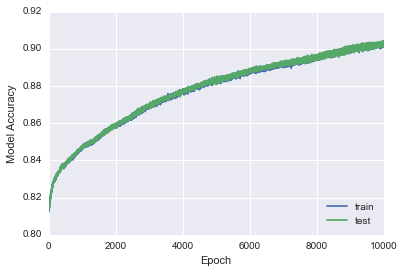

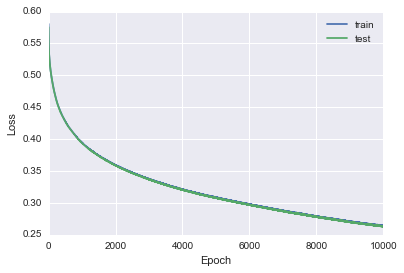

In [52]:
r = range(10, 10000)    
plt.plot(r,history.history['acc'][10:])
plt.plot(r,history.history['val_acc'][10:])
plt.ylabel('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [47]:
y_pred = pd.DataFrame(model.predict_classes(X_test, batch_size=128))
print("accurancy: ", accuracy_score(y_true, y_pred))
print("kappa: ", cohen_kappa_score(y_true, y_pred))

accurancy:  0.8425079945180448
kappa:  0.785965717854435


In [53]:
%%time
epochs=500
model = Sequential()
model.add(Dense(55, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(32, input_dim=784))


#model.add(Dropout(0.5))
#model.add(Dense(55, activation='relu'))
model.add(Dense(5, activation='softmax'))

#optimizer = SGD(lr=0.0001)
#optimizer='rmsprop'
optimizer=Adam(0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=100, epochs=500, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, batch_size=100)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 8756 samples, validate on 8756 samples
Epoch 1/500
8756/8756 [==============================] - 1s 85us/step - loss: 1.7459 - acc: 0.1189 - val_loss: 1.5776 - val_acc: 0.3040
Epoch 2/500
8756/8756 [==============================] - 0s 47us/step - loss: 1.4330 - acc: 0.4197 - val_loss: 1.2937 - val_acc: 0.5762
Epoch 3/500
8756/8756 [==============================] - 0s 46us/step - loss: 1.1777 - acc: 0.7275 - val_loss: 1.0681 - val_acc: 0.7991
Epoch 4/500
8756/8756 [==============================] - 0s 47us/step - loss: 0.9811 - acc: 0.8025 - val_loss: 0.8993 - val_acc: 0.8044
Epoch 5/500
8756/8756 [==============================] - 0s 48us/step - loss: 0.8360 - acc: 0.8056 - val_loss: 0.7778 - val_acc: 0.8069
Epoch 6/500
8756/8756 [==============================] - 0s 47us/step - loss: 0.7347 - acc: 0.8070 - val_loss: 0.6958 - val_acc: 0.8090
Epoch 7/500
8756/8756 [==============================] - 0s 47us/step - loss: 0.6688 - acc: 0.8100 - val_loss: 0.6449 - val_acc: 0.8101


8756/8756 [==============================] - 0s 48us/step - loss: 0.5128 - acc: 0.8196 - val_loss: 0.5122 - val_acc: 0.8199
Epoch 61/500
8756/8756 [==============================] - 0s 49us/step - loss: 0.5125 - acc: 0.8196 - val_loss: 0.5118 - val_acc: 0.8197
Epoch 62/500
8756/8756 [==============================] - 0s 49us/step - loss: 0.5120 - acc: 0.8198 - val_loss: 0.5114 - val_acc: 0.8199
Epoch 63/500
8756/8756 [==============================] - 0s 47us/step - loss: 0.5116 - acc: 0.8210 - val_loss: 0.5110 - val_acc: 0.8198
Epoch 64/500
8756/8756 [==============================] - 0s 46us/step - loss: 0.5111 - acc: 0.8201 - val_loss: 0.5105 - val_acc: 0.8198
Epoch 65/500
8756/8756 [==============================] - 0s 49us/step - loss: 0.5108 - acc: 0.8206 - val_loss: 0.5101 - val_acc: 0.8204
Epoch 66/500
8756/8756 [==============================] - 0s 46us/step - loss: 0.5103 - acc: 0.8210 - val_loss: 0.5097 - val_acc: 0.8207
Epoch 67/500
8756/8756 [==============================

Epoch 120/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4927 - acc: 0.8243 - val_loss: 0.4920 - val_acc: 0.8254
Epoch 121/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4923 - acc: 0.8246 - val_loss: 0.4917 - val_acc: 0.8246
Epoch 122/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4919 - acc: 0.8250 - val_loss: 0.4914 - val_acc: 0.8250
Epoch 123/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4917 - acc: 0.8253 - val_loss: 0.4911 - val_acc: 0.8245
Epoch 124/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4915 - acc: 0.8245 - val_loss: 0.4909 - val_acc: 0.8254
Epoch 125/500
8756/8756 [==============================] - 0s 42us/step - loss: 0.4911 - acc: 0.8254 - val_loss: 0.4905 - val_acc: 0.8259
Epoch 126/500
8756/8756 [==============================] - 0s 42us/step - loss: 0.4908 - acc: 0.8258 - val_loss: 0.4902 - val_acc: 0.8246
Epoch 127/500
8756/8756 [=========

8756/8756 [==============================] - 0s 43us/step - loss: 0.4773 - acc: 0.8280 - val_loss: 0.4767 - val_acc: 0.8278
Epoch 180/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4771 - acc: 0.8274 - val_loss: 0.4765 - val_acc: 0.8277
Epoch 181/500
8756/8756 [==============================] - 0s 41us/step - loss: 0.4768 - acc: 0.8287 - val_loss: 0.4762 - val_acc: 0.8278
Epoch 182/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4766 - acc: 0.8277 - val_loss: 0.4760 - val_acc: 0.8289
Epoch 183/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4765 - acc: 0.8288 - val_loss: 0.4758 - val_acc: 0.8279
Epoch 184/500
8756/8756 [==============================] - 0s 45us/step - loss: 0.4761 - acc: 0.8281 - val_loss: 0.4756 - val_acc: 0.8283
Epoch 185/500
8756/8756 [==============================] - 0s 44us/step - loss: 0.4759 - acc: 0.8278 - val_loss: 0.4754 - val_acc: 0.8290
Epoch 186/500
8756/8756 [=======================

8756/8756 [==============================] - 0s 46us/step - loss: 0.4659 - acc: 0.8313 - val_loss: 0.4653 - val_acc: 0.8315
Epoch 239/500
8756/8756 [==============================] - 0s 47us/step - loss: 0.4657 - acc: 0.8314 - val_loss: 0.4651 - val_acc: 0.8319
Epoch 240/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4656 - acc: 0.8313 - val_loss: 0.4650 - val_acc: 0.8311
Epoch 241/500
8756/8756 [==============================] - 0s 44us/step - loss: 0.4653 - acc: 0.8315 - val_loss: 0.4648 - val_acc: 0.8312
Epoch 242/500
8756/8756 [==============================] - 0s 44us/step - loss: 0.4652 - acc: 0.8317 - val_loss: 0.4646 - val_acc: 0.8312
Epoch 243/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4651 - acc: 0.8315 - val_loss: 0.4644 - val_acc: 0.8322
Epoch 244/500
8756/8756 [==============================] - 0s 44us/step - loss: 0.4649 - acc: 0.8323 - val_loss: 0.4643 - val_acc: 0.8317
Epoch 245/500
8756/8756 [=======================

8756/8756 [==============================] - 0s 40us/step - loss: 0.4563 - acc: 0.8345 - val_loss: 0.4558 - val_acc: 0.8349
Epoch 298/500
8756/8756 [==============================] - 0s 41us/step - loss: 0.4562 - acc: 0.8344 - val_loss: 0.4556 - val_acc: 0.8341
Epoch 299/500
8756/8756 [==============================] - 0s 40us/step - loss: 0.4561 - acc: 0.8337 - val_loss: 0.4555 - val_acc: 0.8345
Epoch 300/500
8756/8756 [==============================] - 0s 41us/step - loss: 0.4559 - acc: 0.8346 - val_loss: 0.4553 - val_acc: 0.8345
Epoch 301/500
8756/8756 [==============================] - 0s 41us/step - loss: 0.4558 - acc: 0.8341 - val_loss: 0.4551 - val_acc: 0.8342
Epoch 302/500
8756/8756 [==============================] - 0s 40us/step - loss: 0.4556 - acc: 0.8343 - val_loss: 0.4551 - val_acc: 0.8335
Epoch 303/500
8756/8756 [==============================] - 0s 40us/step - loss: 0.4555 - acc: 0.8343 - val_loss: 0.4548 - val_acc: 0.8341
Epoch 304/500
8756/8756 [=======================

8756/8756 [==============================] - 0s 41us/step - loss: 0.4483 - acc: 0.8346 - val_loss: 0.4475 - val_acc: 0.8354
Epoch 357/500
8756/8756 [==============================] - 0s 40us/step - loss: 0.4481 - acc: 0.8360 - val_loss: 0.4474 - val_acc: 0.8358
Epoch 358/500
8756/8756 [==============================] - 0s 40us/step - loss: 0.4479 - acc: 0.8353 - val_loss: 0.4473 - val_acc: 0.8351
Epoch 359/500
8756/8756 [==============================] - 0s 40us/step - loss: 0.4479 - acc: 0.8350 - val_loss: 0.4472 - val_acc: 0.8357
Epoch 360/500
8756/8756 [==============================] - 0s 41us/step - loss: 0.4477 - acc: 0.8353 - val_loss: 0.4471 - val_acc: 0.8361
Epoch 361/500
8756/8756 [==============================] - 0s 42us/step - loss: 0.4475 - acc: 0.8359 - val_loss: 0.4470 - val_acc: 0.8362
Epoch 362/500
8756/8756 [==============================] - 0s 46us/step - loss: 0.4474 - acc: 0.8354 - val_loss: 0.4468 - val_acc: 0.8357
Epoch 363/500
8756/8756 [=======================

8756/8756 [==============================] - 0s 51us/step - loss: 0.4414 - acc: 0.8371 - val_loss: 0.4407 - val_acc: 0.8366
Epoch 416/500
8756/8756 [==============================] - 0s 50us/step - loss: 0.4413 - acc: 0.8368 - val_loss: 0.4406 - val_acc: 0.8373
Epoch 417/500
8756/8756 [==============================] - 0s 51us/step - loss: 0.4411 - acc: 0.8366 - val_loss: 0.4406 - val_acc: 0.8369
Epoch 418/500
8756/8756 [==============================] - 0s 49us/step - loss: 0.4410 - acc: 0.8370 - val_loss: 0.4404 - val_acc: 0.8366
Epoch 419/500
8756/8756 [==============================] - 0s 50us/step - loss: 0.4409 - acc: 0.8368 - val_loss: 0.4403 - val_acc: 0.8362
Epoch 420/500
8756/8756 [==============================] - 0s 43us/step - loss: 0.4408 - acc: 0.8366 - val_loss: 0.4402 - val_acc: 0.8379
Epoch 421/500
8756/8756 [==============================] - 0s 42us/step - loss: 0.4407 - acc: 0.8366 - val_loss: 0.4401 - val_acc: 0.8375
Epoch 422/500
8756/8756 [=======================

8756/8756 [==============================] - 0s 42us/step - loss: 0.4354 - acc: 0.8377 - val_loss: 0.4348 - val_acc: 0.8377
Epoch 475/500
8756/8756 [==============================] - 0s 41us/step - loss: 0.4352 - acc: 0.8371 - val_loss: 0.4346 - val_acc: 0.8375
Epoch 476/500
8756/8756 [==============================] - 0s 42us/step - loss: 0.4349 - acc: 0.8384 - val_loss: 0.4345 - val_acc: 0.8377
Epoch 477/500
8756/8756 [==============================] - 0s 42us/step - loss: 0.4350 - acc: 0.8381 - val_loss: 0.4344 - val_acc: 0.8373
Epoch 478/500
8756/8756 [==============================] - 0s 42us/step - loss: 0.4350 - acc: 0.8376 - val_loss: 0.4343 - val_acc: 0.8374
Epoch 479/500
8756/8756 [==============================] - 0s 42us/step - loss: 0.4348 - acc: 0.8370 - val_loss: 0.4342 - val_acc: 0.8377
Epoch 480/500
8756/8756 [==============================] - 0s 42us/step - loss: 0.4347 - acc: 0.8374 - val_loss: 0.4341 - val_acc: 0.8378
Epoch 481/500
8756/8756 [=======================

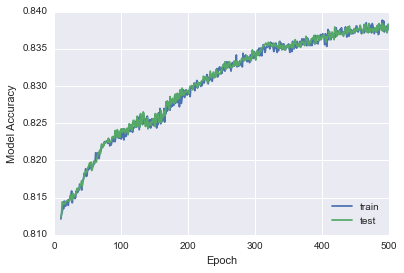

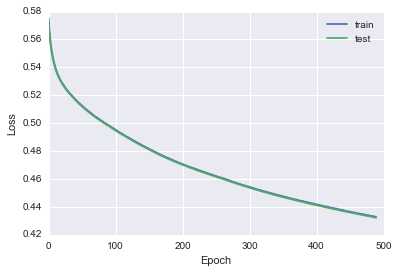

In [54]:
epochs =500
r = range(10, epochs)    
plt.plot(r,history.history['acc'][10:])
plt.plot(r,history.history['val_acc'][10:])
plt.ylabel('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [57]:
%%time
#epochs=500
La = []
Lk = []
model = Sequential()
model.add(Dense(55, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(32, input_dim=784))


#model.add(Dropout(0.5))
#model.add(Dense(55, activation='relu'))
model.add(Dense(5, activation='softmax'))

#optimizer = SGD(lr=0.0001)
#optimizer='rmsprop'
optimizer=Adam(0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

for epochs in range(10, 210, 10):
    history = model.fit(X_train, y_train, batch_size=100, epochs=epochs, validation_data = (X_test, y_test), verbose=0)
    y_pred = pd.DataFrame(model.predict_classes(X_test, batch_size=128))
    print("accurancy: ", accuracy_score(y_true, y_pred))
    print("kappa: ", cohen_kappa_score(y_true, y_pred))

    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("epoch= ", epochs)
    print("kappa = ", k)
    print("accuracy = ", a)
    
    Lk.append(k)
    La.append(a)

accurancy:  0.8112151667428049
kappa:  0.7422721494381452
epoch=  10
kappa =  0.7422721494381452
accuracy =  0.8112151667428049
accurancy:  0.8173823663773413
kappa:  0.7512143030926961
epoch=  20
kappa =  0.7512143030926961
accuracy =  0.8173823663773413
accurancy:  0.8233211512105985
kappa:  0.7594948784719155
epoch=  30
kappa =  0.7594948784719155
accuracy =  0.8233211512105985
accurancy:  0.8264047510278666
kappa:  0.7637591608397765
epoch=  40
kappa =  0.7637591608397765
accuracy =  0.8264047510278666
accurancy:  0.8294883508451347
kappa:  0.7681054930885716
epoch=  50
kappa =  0.7681054930885716
accuracy =  0.8294883508451347
accurancy:  0.8310872544540886
kappa:  0.7703969261921303
epoch=  60
kappa =  0.7703969261921303
accuracy =  0.8310872544540886
accurancy:  0.8331429876656007
kappa:  0.7731796298416758
epoch=  70
kappa =  0.7731796298416758
accuracy =  0.8331429876656007
accurancy:  0.8370260392873459
kappa:  0.7785047571583217
epoch=  80
kappa =  0.7785047571583217
accurac

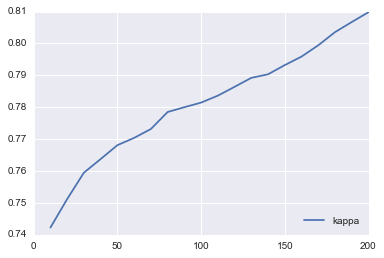

In [58]:
r = list(range(10, 210, 10))
plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')
plt.show()

## Submit

In [8]:
%%time
epochs=130
model = Sequential()
model.add(Dense(55, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(32, input_dim=784))


#model.add(Dropout(0.5))
#model.add(Dense(55, activation='relu'))
model.add(Dense(5, activation='softmax'))

#optimizer = SGD(lr=0.0001)
#optimizer='rmsprop'
optimizer=Adam(0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=100, epochs=epochs, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, batch_size=100)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 8756 samples, validate on 8756 samples
Epoch 1/130
8756/8756 [==============================] - 1s 98us/step - loss: 1.5404 - acc: 0.3064 - val_loss: 1.4019 - val_acc: 0.5131
Epoch 2/130
8756/8756 [==============================] - 0s 47us/step - loss: 1.2851 - acc: 0.6484 - val_loss: 1.1734 - val_acc: 0.7060
Epoch 3/130
8756/8756 [==============================] - 0s 50us/step - loss: 1.0796 - acc: 0.7309 - val_loss: 0.9896 - val_acc: 0.7670
Epoch 4/130
8756/8756 [==============================] - 0s 45us/step - loss: 0.9171 - acc: 0.7821 - val_loss: 0.8492 - val_acc: 0.7921
Epoch 5/130
8756/8756 [==============================] - 0s 46us/step - loss: 0.7989 - acc: 0.7976 - val_loss: 0.7529 - val_acc: 0.8026
Epoch 6/130
8756/8756 [==============================] - 0s 46us/step - loss: 0.7189 - acc: 0.8045 - val_loss: 0.6877 - val_acc: 0.8056
Epoch 7/130
8756/8756 [==============================] - 0s 50us/step - loss: 0.6650 - acc: 0.8072 - val_loss: 0.6441 - val_acc: 0.8077


8756/8756 [==============================] - 0s 42us/step - loss: 0.5103 - acc: 0.8215 - val_loss: 0.5097 - val_acc: 0.8220
Epoch 61/130
8756/8756 [==============================] - 0s 42us/step - loss: 0.5098 - acc: 0.8223 - val_loss: 0.5092 - val_acc: 0.8217
Epoch 62/130
8756/8756 [==============================] - 0s 41us/step - loss: 0.5095 - acc: 0.8223 - val_loss: 0.5089 - val_acc: 0.8214
Epoch 63/130
8756/8756 [==============================] - 0s 42us/step - loss: 0.5091 - acc: 0.8216 - val_loss: 0.5084 - val_acc: 0.8218
Epoch 64/130
8756/8756 [==============================] - 0s 44us/step - loss: 0.5087 - acc: 0.8224 - val_loss: 0.5081 - val_acc: 0.8215
Epoch 65/130
8756/8756 [==============================] - 0s 44us/step - loss: 0.5083 - acc: 0.8221 - val_loss: 0.5075 - val_acc: 0.8218
Epoch 66/130
8756/8756 [==============================] - 0s 48us/step - loss: 0.5077 - acc: 0.8221 - val_loss: 0.5071 - val_acc: 0.8221
Epoch 67/130
8756/8756 [==============================

Epoch 120/130
8756/8756 [==============================] - 0s 41us/step - loss: 0.4898 - acc: 0.8255 - val_loss: 0.4892 - val_acc: 0.8257
Epoch 121/130
8756/8756 [==============================] - 0s 41us/step - loss: 0.4896 - acc: 0.8255 - val_loss: 0.4890 - val_acc: 0.8263
Epoch 122/130
8756/8756 [==============================] - 0s 42us/step - loss: 0.4894 - acc: 0.8255 - val_loss: 0.4887 - val_acc: 0.8257
Epoch 123/130
8756/8756 [==============================] - 0s 42us/step - loss: 0.4890 - acc: 0.8254 - val_loss: 0.4885 - val_acc: 0.8259
Epoch 124/130
8756/8756 [==============================] - 0s 41us/step - loss: 0.4888 - acc: 0.8255 - val_loss: 0.4882 - val_acc: 0.8259
Epoch 125/130
8756/8756 [==============================] - 0s 41us/step - loss: 0.4884 - acc: 0.8258 - val_loss: 0.4879 - val_acc: 0.8259
Epoch 126/130
8756/8756 [==============================] - 0s 41us/step - loss: 0.4882 - acc: 0.8255 - val_loss: 0.4877 - val_acc: 0.8262
Epoch 127/130
8756/8756 [=========

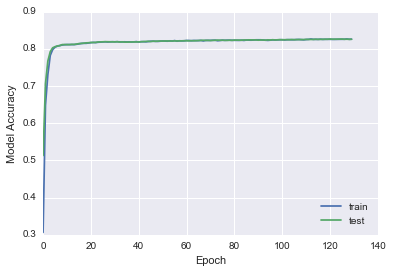

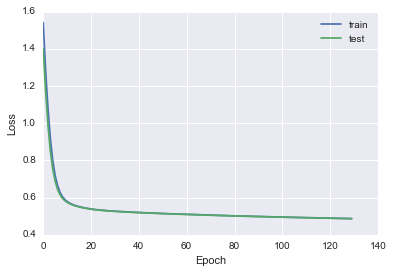

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [12]:
challengetrain = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\proba11challengetrain.xlsx')
challengeTest = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\proba11challengetest.xlsx')  


In [13]:

X_challengetest = challengeTest.values


In [19]:
y_challenge = model.predict_classes(X_challengetest, batch_size=128)

In [20]:
 # score 0.68154108195142
d = {'label':y_challenge}
result = pd.DataFrame(data=d)
result.to_csv('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\processed\\all11_xgb_180_8_l5_NN130.csv', 
             sep = ";",
             index_label="id")

In [23]:
X = challengetrain.iloc[:,:-1]
X_train = X.values
y = challengetrain.iloc[:,-1]
y_train = to_categorical(y.values, num_classes=5)

In [24]:
print(X.shape)
print(X_test.shape)
print(y.shape)

(43820, 55)
(8756, 55)
(43820,)


In [25]:
%%time
epochs =130
model = Sequential()
model.add(Dense(55, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(5, activation='softmax'))
optimizer=Adam(0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=130, epochs=epochs, verbose=1)
y_pred = pd.DataFrame(model.predict_classes(X_test, batch_size=128))

Epoch 1/130
43820/43820 [==============================] - 1s 31us/step - loss: 1.1538 - acc: 0.6837
Epoch 2/130
43820/43820 [==============================] - 1s 26us/step - loss: 0.4297 - acc: 0.9457
Epoch 3/130
43820/43820 [==============================] - 1s 28us/step - loss: 0.2192 - acc: 0.9597
Epoch 4/130
43820/43820 [==============================] - 1s 26us/step - loss: 0.1473 - acc: 0.9681
Epoch 5/130
43820/43820 [==============================] - 1s 26us/step - loss: 0.1112 - acc: 0.9739
Epoch 6/130
43820/43820 [==============================] - 1s 26us/step - loss: 0.0872 - acc: 0.9783
Epoch 7/130
43820/43820 [==============================] - 1s 27us/step - loss: 0.0685 - acc: 0.9826
Epoch 8/130
43820/43820 [==============================] - 1s 27us/step - loss: 0.0539 - acc: 0.9860
Epoch 9/130
43820/43820 [==============================] - 1s 26us/step - loss: 0.0426 - acc: 0.9898
Epoch 10/130
43820/43820 [==============================] - 1s 26us/step - loss: 0.0338 - a

43820/43820 [==============================] - 1s 23us/step - loss: 1.9831e-04 - acc: 0.9998
Epoch 80/130
43820/43820 [==============================] - 1s 23us/step - loss: 1.9666e-04 - acc: 0.9999
Epoch 81/130
43820/43820 [==============================] - 1s 23us/step - loss: 1.9508e-04 - acc: 0.9999
Epoch 82/130
43820/43820 [==============================] - 1s 23us/step - loss: 1.9304e-04 - acc: 0.9999
Epoch 83/130
43820/43820 [==============================] - 1s 23us/step - loss: 1.9147e-04 - acc: 0.9998
Epoch 84/130
43820/43820 [==============================] - 1s 24us/step - loss: 1.9039e-04 - acc: 0.9998
Epoch 85/130
43820/43820 [==============================] - 1s 24us/step - loss: 1.8864e-04 - acc: 0.9999
Epoch 86/130
43820/43820 [==============================] - 1s 24us/step - loss: 1.8696e-04 - acc: 0.9999
Epoch 87/130
43820/43820 [==============================] - 1s 23us/step - loss: 1.8531e-04 - acc: 0.9999
Epoch 88/130
43820/43820 [==============================] -

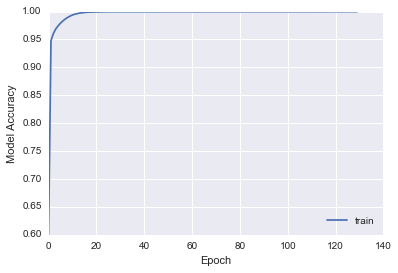

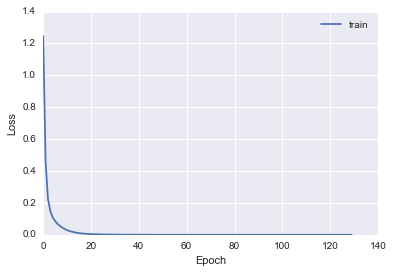

In [72]:
   
plt.plot(history.history['acc'])
plt.ylabel('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [62]:
i=11
train5 = reshape_n(df.iloc[:,:-1], i)
train5["Y"]= df.iloc[:,-1]

for j in range(0, i//2):
  train5.drop([train5.shape[0]-(i+1)], inplace=True)

X = train5.iloc[:,:-1]
y = train5.iloc[:,-1]

In [ ]:
xbc = xgb.XGBClassifier(n_estimators = 180, random_state=42, learning_rate= 0.1, max_depth= 8,  subsample= 0.7, 
                            n_jobs=-2, reg_lambda=5)
xbc.fit(X, y)
#y_pred = xbc.predict(X_test)
proba_X = xbc.predict_proba(X)

In [ ]:
challengeTest = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\proba11challengetest.xlsx')  


In [ ]:
X = training.iloc[:,:-1]
X_train = X.values
y = training.iloc[:,-1]
y_train = to_categorical(y.values, num_classes=5)
X_test = test.iloc[:,:-1].values
y_true = test.iloc[:,-1].values
y_test = to_categorical(y_true, num_classes=5)

In [ ]:
%%time
epochs=100
model = Sequential()
model.add(Dense(55, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(5, activation='softmax'))
optimizer=Adam(0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


history = model.fit(X_train, y_train, batch_size=100, epochs=epochs, validation_data = (X_test, y_test), verbose=0)
y_pred = pd.DataFrame(model.predict_classes(X_test, batch_size=128))

xbc.fit(X, y)
y_pred = xbc.predict(X_test)

In [ ]:
d = {'label':y_pred}
result = pd.DataFrame(data=d)
result.to_csv('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\processed\\all11_xgb_180_8_l5_NN100.csv', 
             sep = ";",
             index_label="id")